# TOPIC: Term Deposit Subscription Prediction

## Introduction

The project is focused on predicting term deposit subscription of a bank from the bank's marketting dataset. In today's competitive banking industry customer acquisition and retention are vital for Bank's success. The ability to accurately identify potential customers can significantly impact bank's marketting strategy and overall business success. The aim of this project is to build a model which will provide valuable insights to the bank, enabling them to allocate their marketing resources more efficiently and tailor their promotional efforts to those customers who are more likely to convert. 

## Business Objective

Term Deposit is a type of investment done in a bank who give a certain rate of interest on a condition that the deposited amount cannot be withdrawn until the term ends. Term deposits are important because within the term of the investment banks can lend this money to the businesses and earn from the interest. Term Depositd are one of the best investment options for many people who are looking for stable and safe return on their investments. Banks spend lots of money in direct and indirect marketting to acquire customers to invest in their term deposit plans. Therefore it is very important for the banks to identify potential customers who are eger to invest in term deposit plans thereby they can spend there marketting budget more efficiently to reach out to these people and convert them into customers.  

### Importing The Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [4]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [5]:
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances

In [232]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve

In [7]:
import association_metrics as am
from dython.nominal import associations

In [9]:
train=pd.read_csv('Train_eP48B9k.csv')
test=pd.read_csv('Test_jPKyvmK.csv')

## Data Understanding

In [10]:
train.head(200)

id  customer_age     job_type  marital  education default  balance  \
0    id_43823          28.0   management   single   tertiary      no    285.0   
1    id_32289          34.0  blue-collar  married  secondary      no    934.0   
2    id_10523          46.0   technician  married  secondary      no    656.0   
3    id_43951          34.0     services   single  secondary      no      2.0   
4    id_40992          41.0  blue-collar  married    primary      no   1352.0   
..        ...           ...          ...      ...        ...     ...      ...   
195   id_1091          35.0  blue-collar  married  secondary      no    177.0   
196   id_7066          47.0   management  married   tertiary      no    267.0   
197   id_5183          29.0   management  married   tertiary      no      2.0   
198  id_30044          47.0   management  married  secondary      no     -2.0   
199   id_8234          33.0   technician   single  secondary     yes   -483.0   

    housing_loan personal_loan communication_type  day_of_month month  \
0            yes            no            unknown            26   jun   
1             no           yes           cellular            18   nov   
2             no            no           cellular             5   feb   
3            yes            no            unknown            20   may   
4            yes            no           cellular            13   may   
..           ...           ...                ...           ...   ...   
195          yes            no            unknown            15   may   
196          yes            no           cellular            15   jul   
197          yes            no            unknown            23   may   
198          yes            no            unknown            14   may   
199          yes            no           cellular            17   apr   

     last_contact_duration  num_contacts_in_campaign  \
0                    303.0                       4.0   
1                    143.0                       2.0   
2                    101.0                       4.0   
3                    127.0                       3.0   
4                     49.0                       2.0   
..                     ...                       ...   
195                  373.0                       2.0   
196                   92.0                       2.0   
197                  205.0                       1.0   
198                   80.0                       4.0   
199                 1065.0                       1.0   

     days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                                 NaN                           0   
1                               132.0                           1   
2                                 NaN                           0   
3                                 NaN                           0   
4                                 NaN                           0   
..                                ...                         ...   
195                               NaN                           0   
196                               NaN                           0   
197                               NaN                           0   
198                               NaN                           0   
199                               NaN                           0   

    prev_campaign_outcome  term_deposit_subscribed  
0                 unknown                        0  
1                   other                        0  
2                 unknown                        0  
3                 unknown                        0  
4                 unknown                        0  
..                    ...                      ...  
195               unknown                        0  
196               unknown                        0  
197               unknown                        0  
198               unknown                        0  
199               unknown                        1  

[200 rows x 18 columns

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
test.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single    unknown      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                               NaN                           0   
2                               NaN                           0   
3                               NaN                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [13]:
train.shape

(31647, 18)

In [14]:
df_train=train.copy()
df_test=test.copy()

In [15]:
df_train.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [16]:
train.isnull().sum()/len(train)

id                                  0.000000
customer_age                        0.019560
job_type                            0.000000
marital                             0.004740
education                           0.000000
default                             0.000000
balance                             0.012608
housing_loan                        0.000000
personal_loan                       0.004708
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.009827
num_contacts_in_campaign            0.003539
days_since_prev_campaign_contact    0.816223
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
term_deposit_subscribed             0.000000
dtype: float64

In [17]:
test.isnull().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [18]:
test.isnull().sum()/len(test)

id                                  0.000000
customer_age                        0.019906
job_type                            0.000000
marital                             0.005972
education                           0.000000
default                             0.000000
balance                             0.013344
housing_loan                        0.000000
personal_loan                       0.005456
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.008994
num_contacts_in_campaign            0.003318
days_since_prev_campaign_contact    0.820038
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
dtype: float64

In [19]:
test.shape

(13564, 17)

In [20]:
id, target = 'id','term_Deposit_subscribed'

In [21]:
train.head()

id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                             132.0                           1   
2                               NaN                           0   
3                               NaN                           0   
4                               NaN                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [22]:
train.duplicated().sum()

0

In [23]:
test.duplicated().sum()

0

In [24]:
train.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [25]:
test.nunique()

id                                  13564
customer_age                           73
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              4414
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1186
num_contacts_in_campaign               38
days_since_prev_campaign_contact      417
num_contacts_prev_campaign             30
prev_campaign_outcome                   4
dtype: int64

In [26]:
numerical_train=df_train.select_dtypes(include=np.number).columns.tolist()
numerical_test=df_test.select_dtypes(include=np.number).columns.tolist()

In [27]:
numerical_train

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign',
 'term_deposit_subscribed']

In [28]:
df_train.drop('id',axis=1,inplace=True)

In [29]:
categorical_train=df_train.select_dtypes(exclude=np.number).columns.tolist()
categorical_test=df_test.select_dtypes(exclude=np.number).columns.tolist()

In [30]:
categorical_train

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      31028 non-null  float64
 1   job_type                          31647 non-null  object 
 2   marital                           31497 non-null  object 
 3   education                         31647 non-null  object 
 4   default                           31647 non-null  object 
 5   balance                           31248 non-null  float64
 6   housing_loan                      31647 non-null  object 
 7   personal_loan                     31498 non-null  object 
 8   communication_type                31647 non-null  object 
 9   day_of_month                      31647 non-null  int64  
 10  month                             31647 non-null  object 
 11  last_contact_duration             31336 non-null  float64
 12  num_

## Data Preparation

### Missing value Imputation

In [32]:
df_train.isnull().sum()

customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [33]:
df_test.isnull().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [34]:
df_train.isnull().sum()* 100/ len(df_train) 

customer_age                         1.955952
job_type                             0.000000
marital                              0.473979
education                            0.000000
default                              0.000000
balance                              1.260783
housing_loan                         0.000000
personal_loan                        0.470819
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
term_deposit_subscribed              0.000000
dtype: float64

In [35]:
df_test.isnull().sum()* 100/ len(df_test) 

id                                   0.000000
customer_age                         1.990563
job_type                             0.000000
marital                              0.597169
education                            0.000000
default                              0.000000
balance                              1.334415
housing_loan                         0.000000
personal_loan                        0.545562
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.899440
num_contacts_in_campaign             0.331761
days_since_prev_campaign_contact    82.003834
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
dtype: float64

In [36]:
df_train['days_since_prev_campaign_contact']=df_train['days_since_prev_campaign_contact'].replace(np.nan,999)
df_train.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [37]:
df_test['days_since_prev_campaign_contact']=df_test['days_since_prev_campaign_contact'].replace(np.nan,999)
df_test.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single    unknown      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             999.0                           0   
2                             999.0                           0   
3                             999.0                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [38]:
df_train['balance']=df_train['balance'].replace(np.nan,df_train['balance'].median())

In [39]:
df_test['balance']=df_test['balance'].replace(np.nan,df_test['balance'].median())

In [40]:
#MICE IMPUTATION : an itterative method of imputation for special categories like age
imputer = IterativeImputer(random_state = 100, max_iter = 10)
df_train1 = df_train.loc[:, ['customer_age']]
df_train1.head(5)
imputer.fit(df_train1)
df_imputed = imputer.transform(df_train1)
df_imputed[:5]
df_train1.loc[:, ['customer_age']] = df_imputed
df_train1.head()
df_train['customer_age'] = df_train1['customer_age'].round()
df_train.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [41]:
#MICE IMPUTATION : an itterative method of imputation for special categories like age
imputer = IterativeImputer(random_state = 100, max_iter = 10)
df_test1 = df_test.loc[:, ['customer_age']]
df_test1.head(5)
imputer.fit(df_test1)
df_imputed = imputer.transform(df_test1)
df_imputed[:5]
df_test1.loc[:, ['customer_age']] = df_imputed
df_test1.head()
df_test['customer_age'] = df_test1['customer_age'].round()
df_test.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single    unknown      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             999.0                           0   
2                             999.0                           0   
3                             999.0                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [42]:
df_train.isnull().sum()* 100/ len(df_train) 

customer_age                        0.000000
job_type                            0.000000
marital                             0.473979
education                           0.000000
default                             0.000000
balance                             0.000000
housing_loan                        0.000000
personal_loan                       0.470819
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.982716
num_contacts_in_campaign            0.353904
days_since_prev_campaign_contact    0.000000
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
term_deposit_subscribed             0.000000
dtype: float64

In [43]:
df_test.isnull().sum()* 100/ len(df_test) 

id                                  0.000000
customer_age                        0.000000
job_type                            0.000000
marital                             0.597169
education                           0.000000
default                             0.000000
balance                             0.000000
housing_loan                        0.000000
personal_loan                       0.545562
communication_type                  0.000000
day_of_month                        0.000000
month                               0.000000
last_contact_duration               0.899440
num_contacts_in_campaign            0.331761
days_since_prev_campaign_contact    0.000000
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
dtype: float64

In [44]:
Missing=df_train.columns[df_train.isnull().any()].tolist() 
Missing

['marital',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign']

In [45]:
Missing_test=df_test.columns[df_test.isnull().any()].tolist() 
Missing_test

['marital',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign']

In [46]:
#we are droping the missing value as it is less than 5% of the total data
df_train.dropna(subset=Missing,inplace=True)

In [47]:
#we are droping the missing value as it is less than 5% of the total data
df_test.dropna(subset=Missing_test,inplace=True)

In [48]:
df_train.isnull().sum()

customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

In [49]:
df_test.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

In [50]:
df_train["job_type"] = df_train["job_type"].astype("category")
df_train["education"] = df_train["education"].astype("category")

In [51]:
df_train["job_type"] = df_train["job_type"].cat.remove_categories("unknown")
df_train["education"] = df_train["education"].cat.remove_categories("unknown")

In [52]:
df_train["job_type"] = df_train["job_type"].astype("object")
df_train["education"] = df_train["education"].astype("object")

## EDA

### Checking outliers for our train dataset

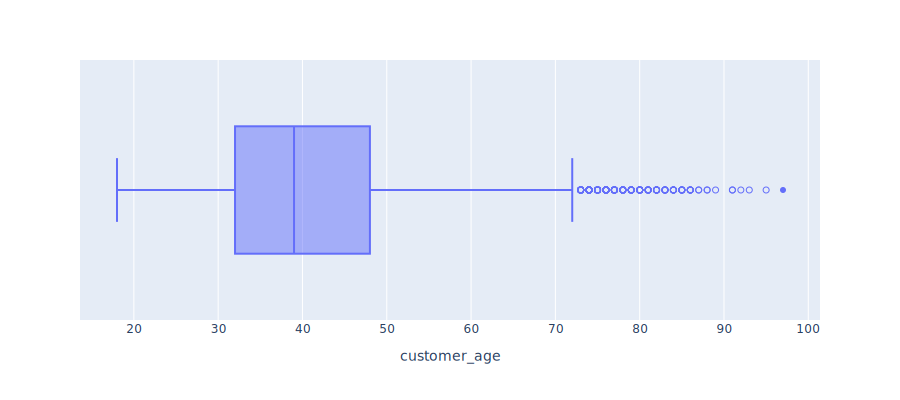

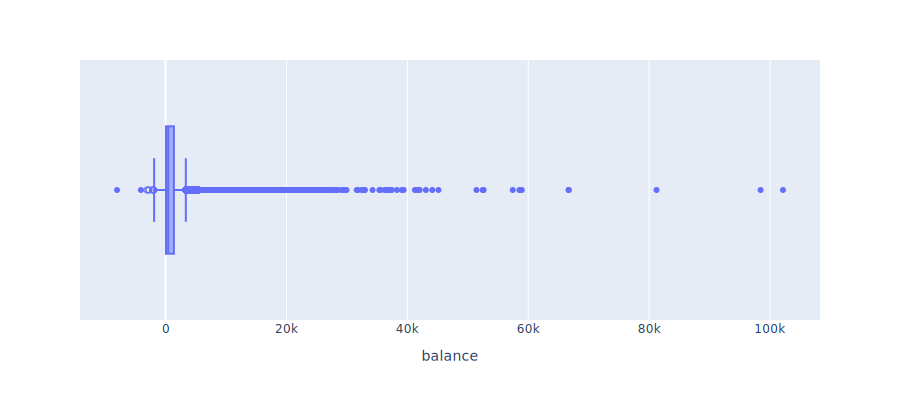

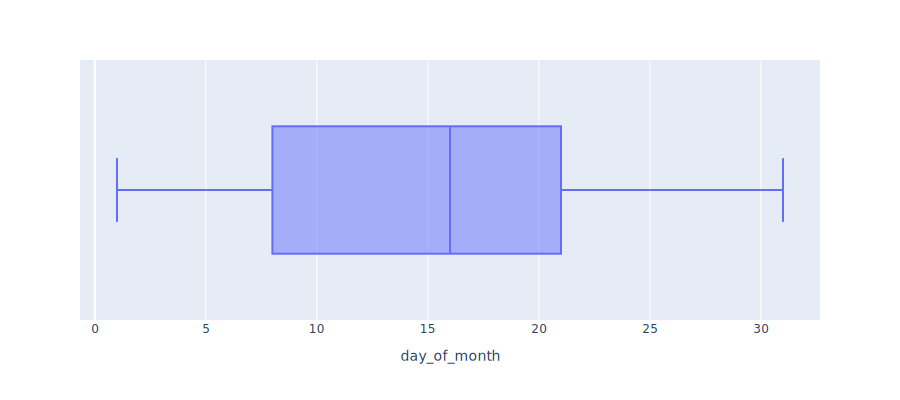

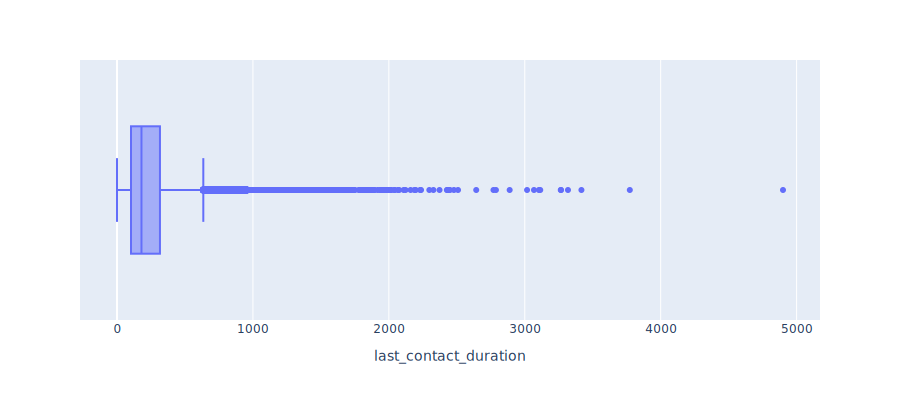

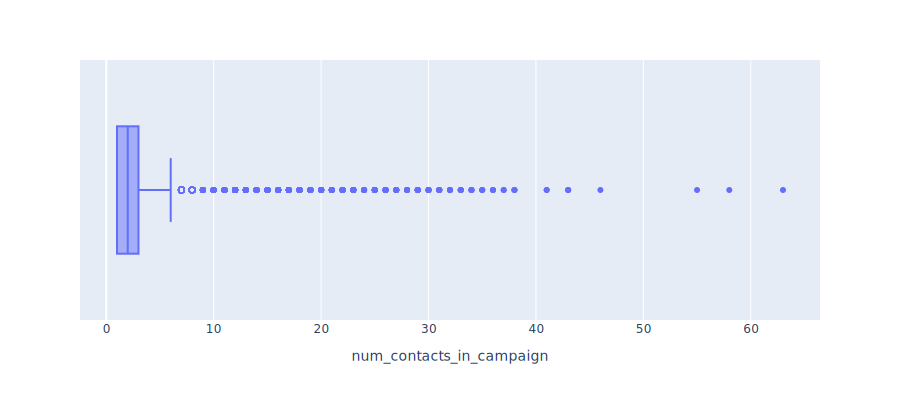

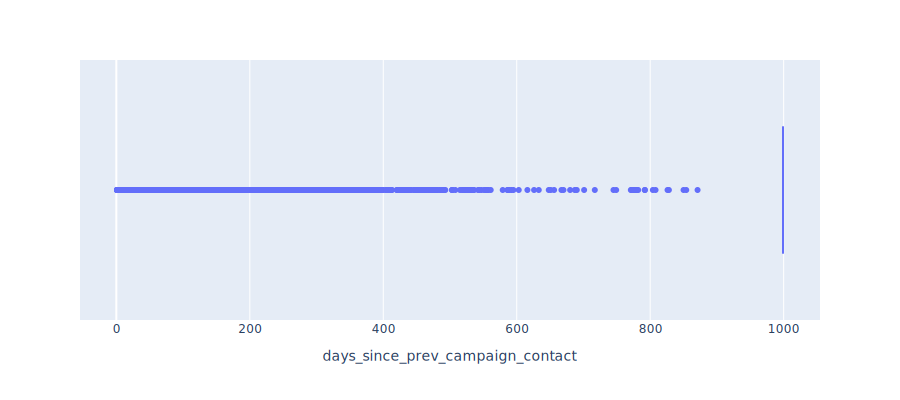

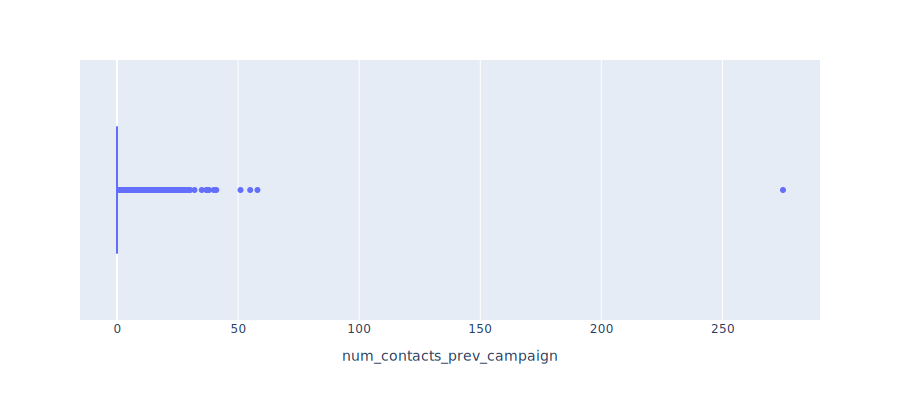

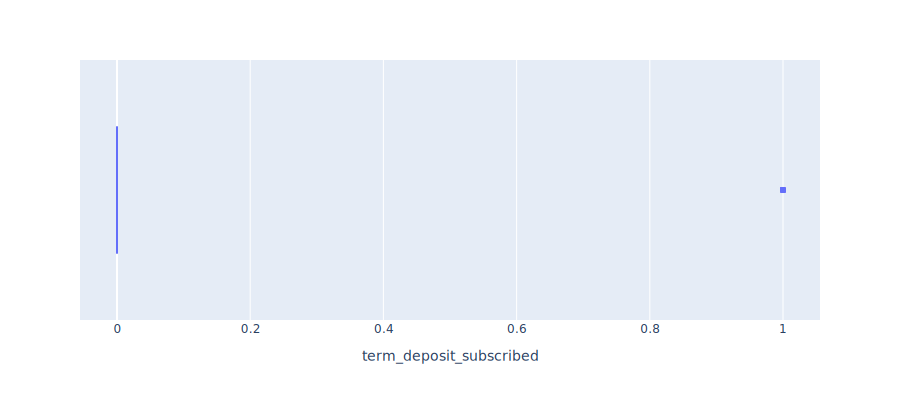

In [61]:
for column in numerical_train:
    fig=px.box(df_train,x=column,points='suspectedoutliers')
    fig.update_layout(width=900, height=400)
    fig.show('svg')

In [54]:
df_train.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [55]:
df_train.term_deposit_subscribed.value_counts()

0    27610
1     3320
Name: term_deposit_subscribed, dtype: int64

### Checking outliers for our test data

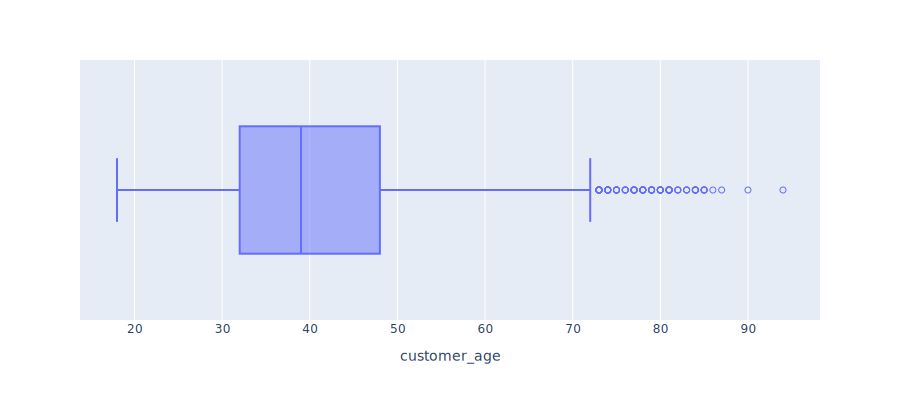

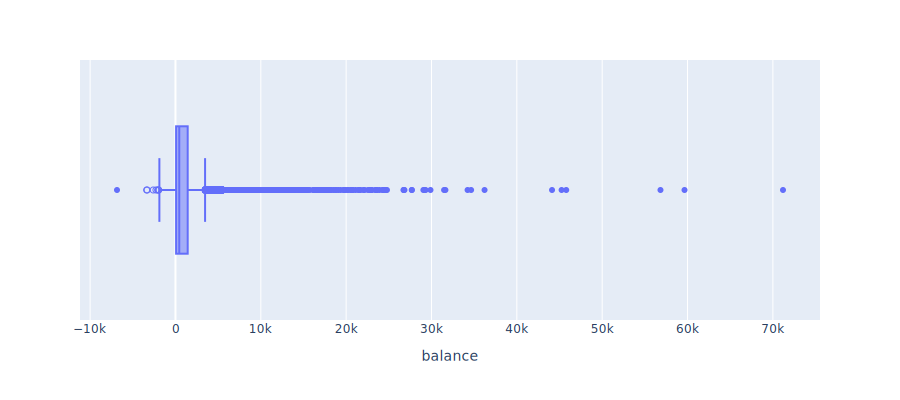

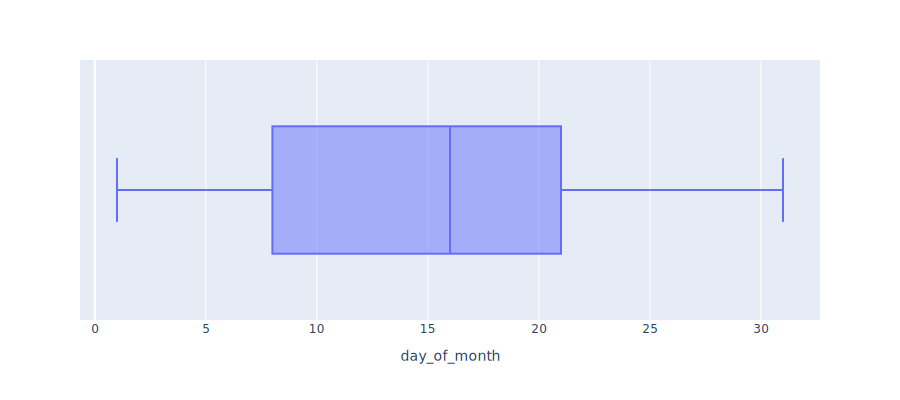

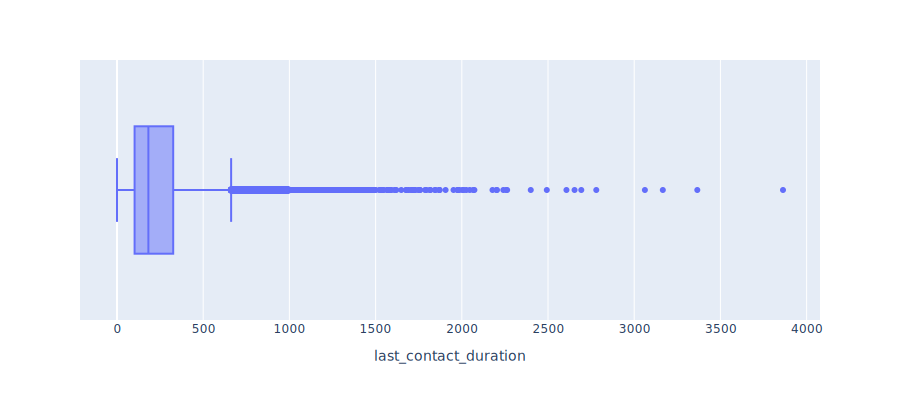

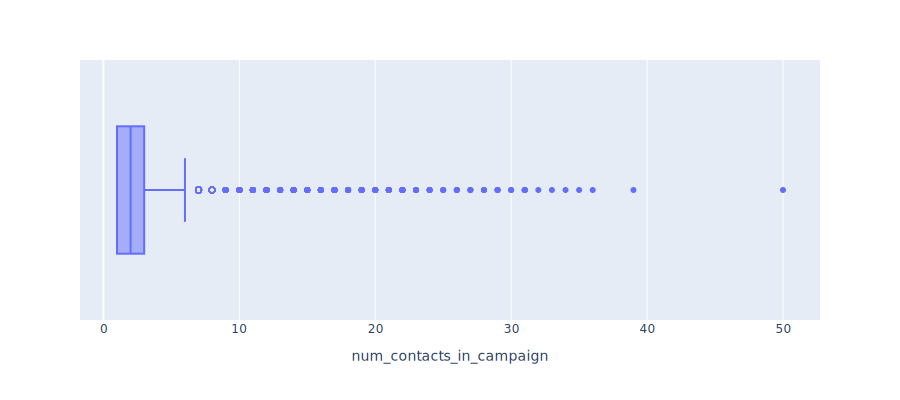

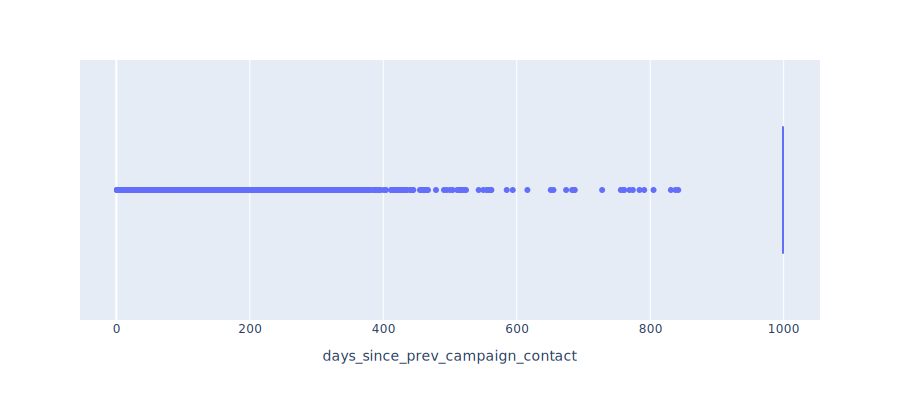

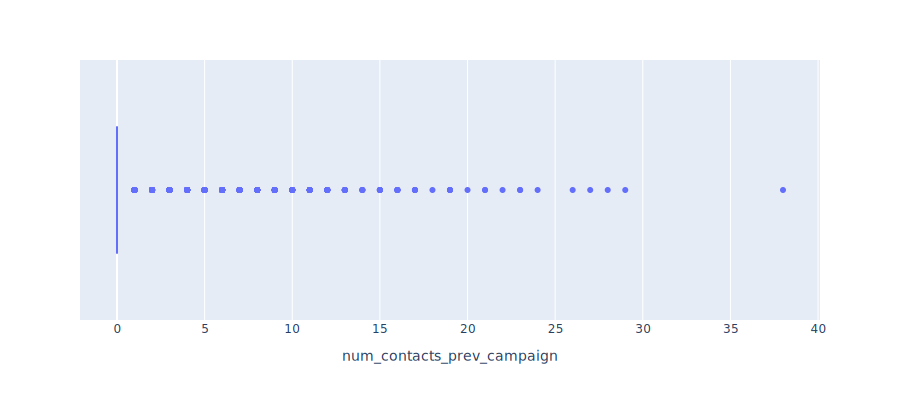

In [62]:
for column in numerical_test:
    fig=px.box(df_test,x=column,points='suspectedoutliers')
    fig.update_layout(width=900, height=400)
    fig.show('svg')

### Univariate Analysis

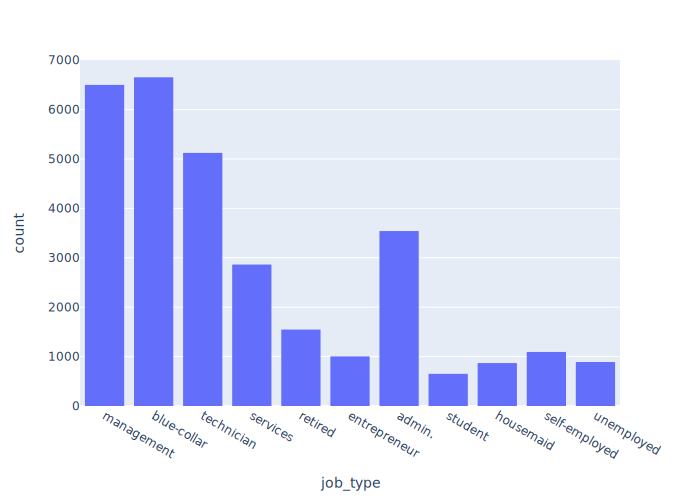

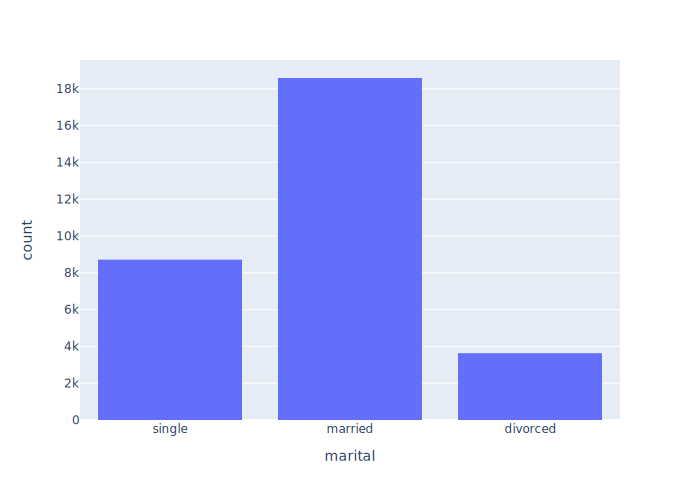

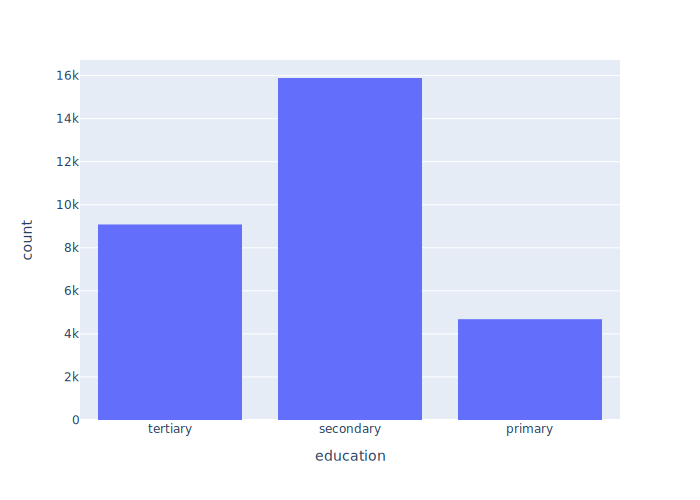

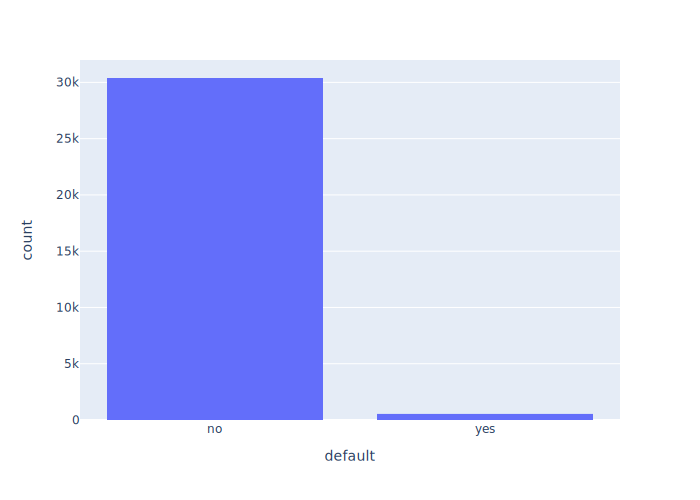

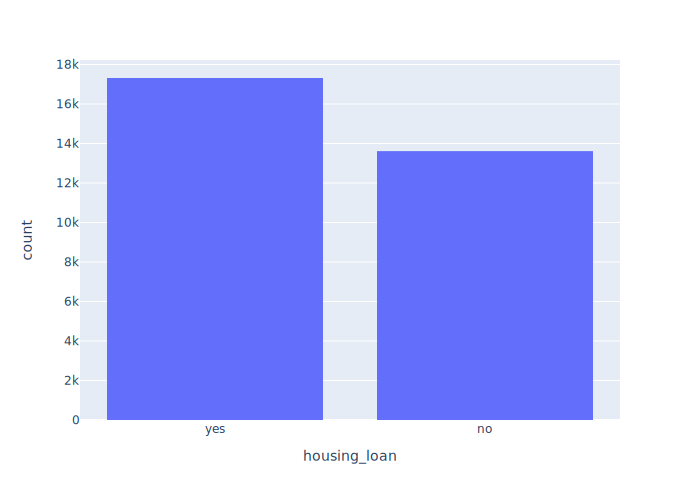

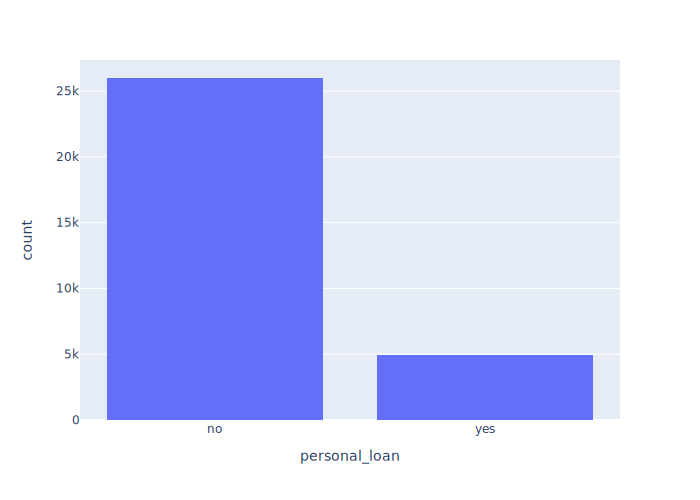

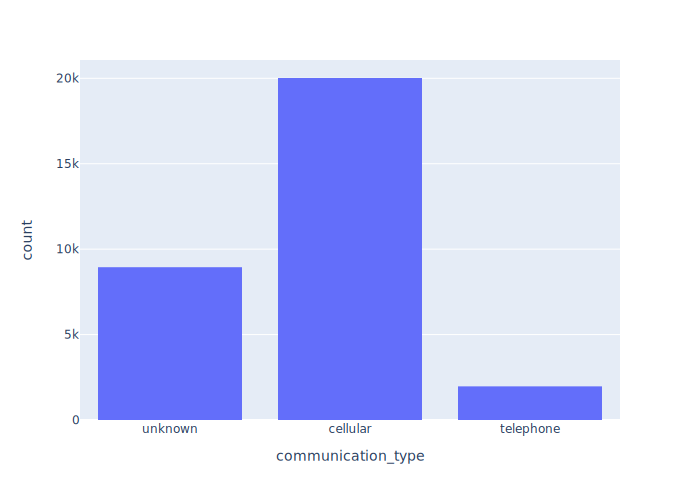

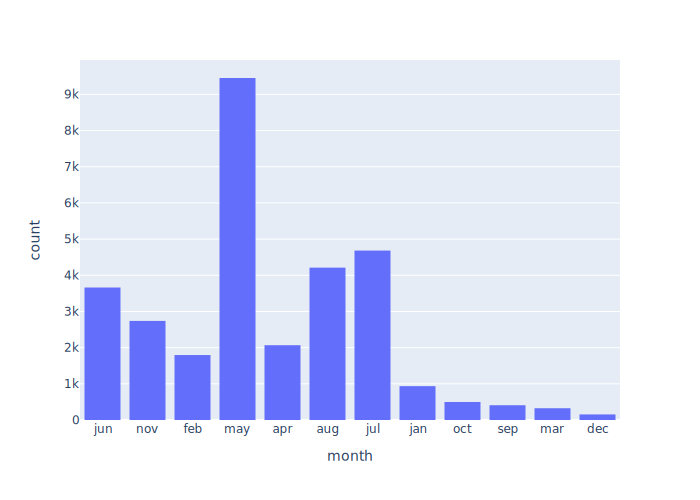

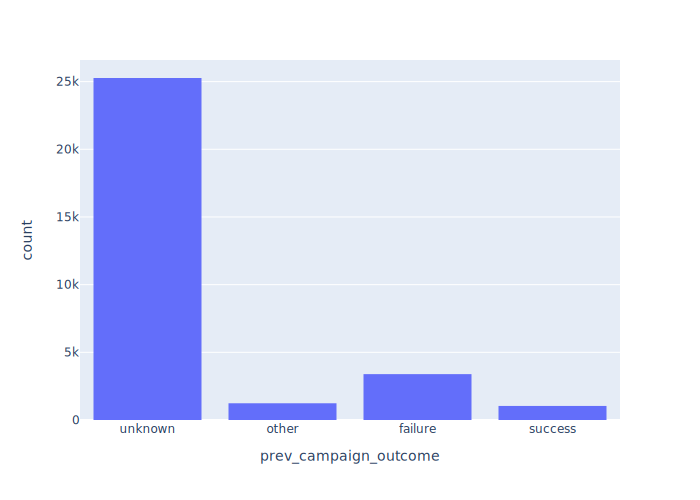

In [57]:
for column in categorical_train:
    fig=px.histogram(df_train,x=column)
    fig.show('svg')

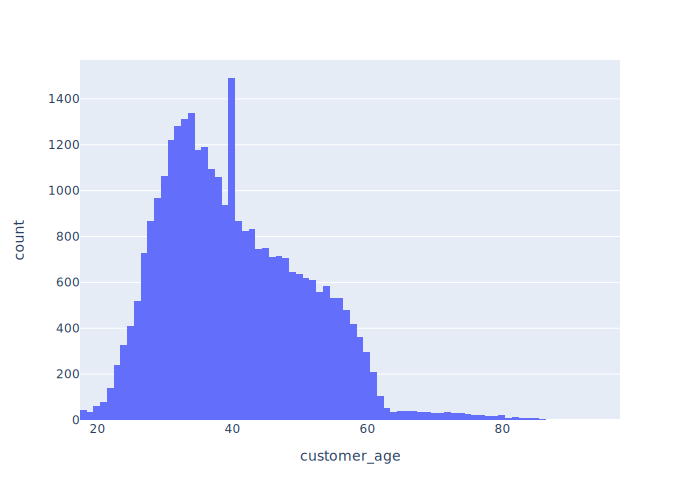

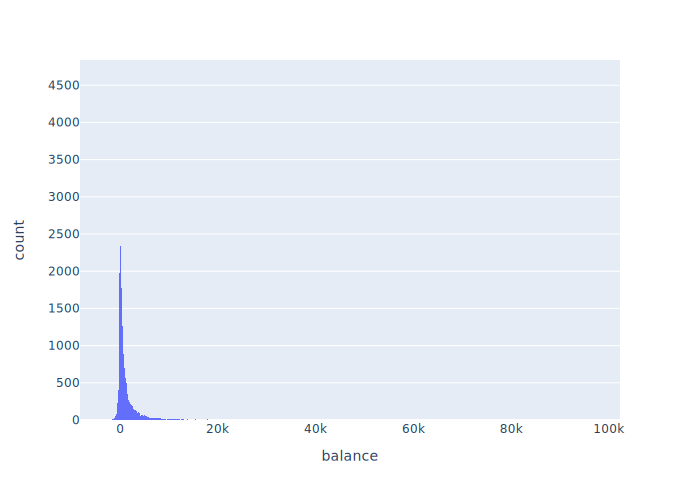

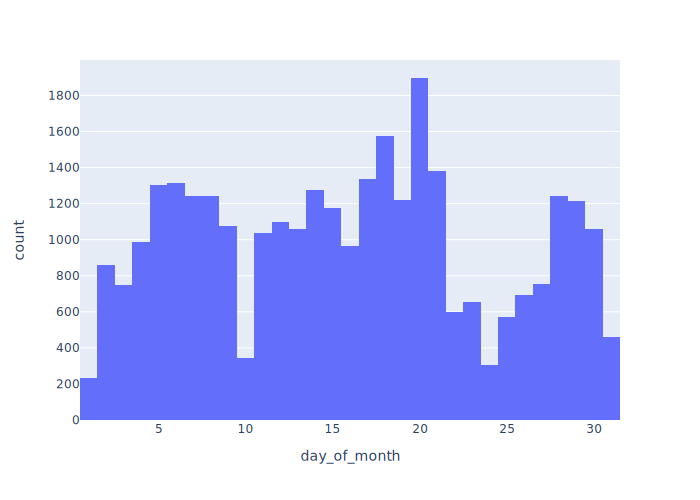

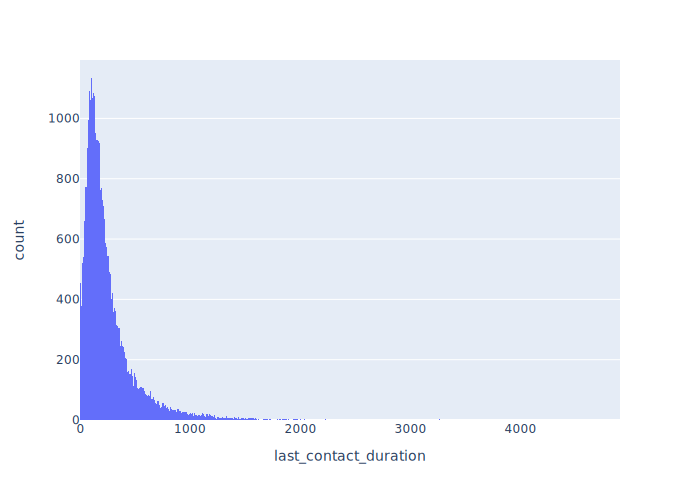

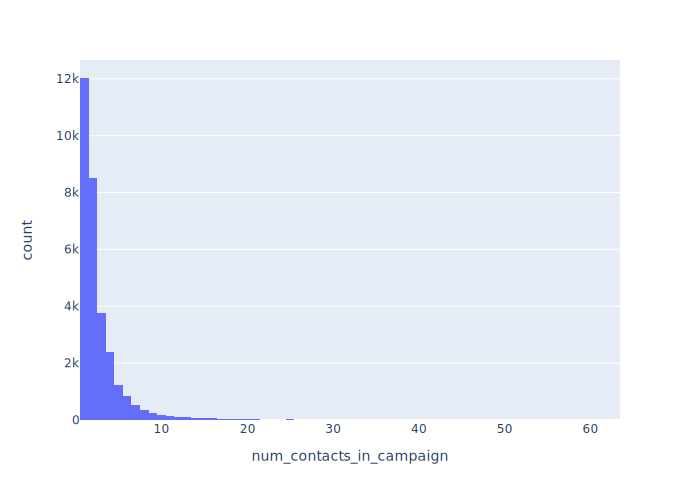

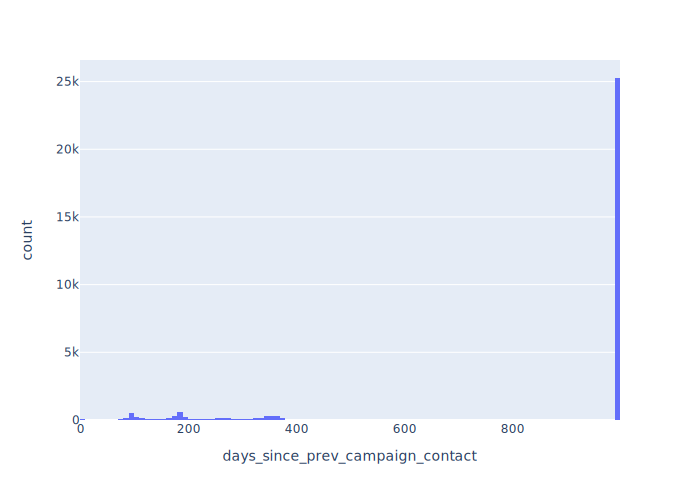

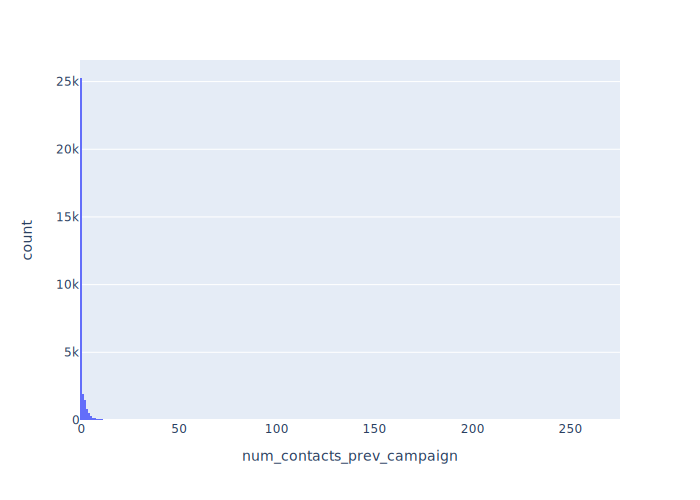

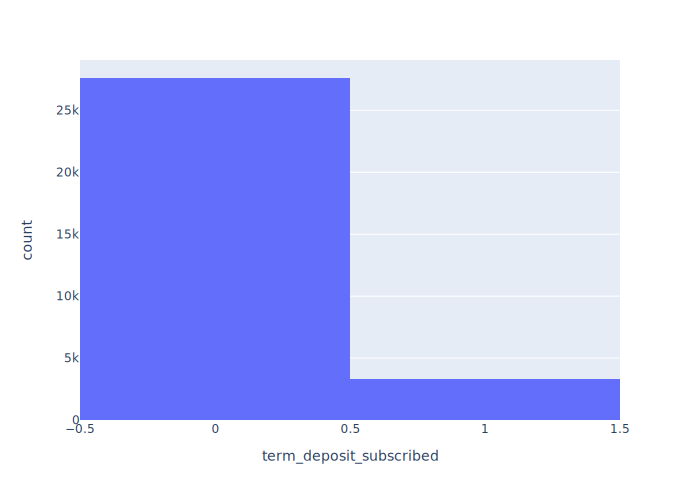

In [58]:
for column in numerical_train:
    fig=px.histogram(df_train,x=column)
    fig.show('svg')

### Bivariate Analysis

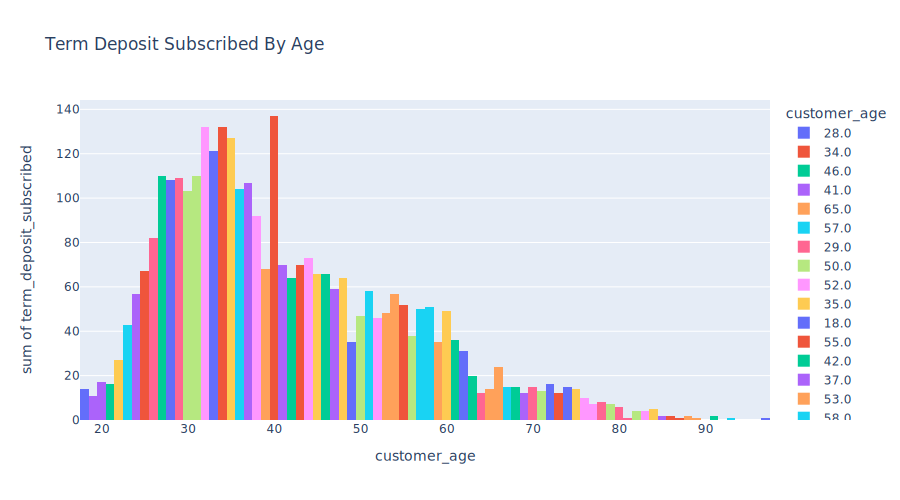

In [66]:
fig=px.histogram(df_train,x='customer_age',y='term_deposit_subscribed',color='customer_age',title='Term Deposit Subscribed By Age')
fig.update_layout(width=900, height=500)
fig.show('svg')

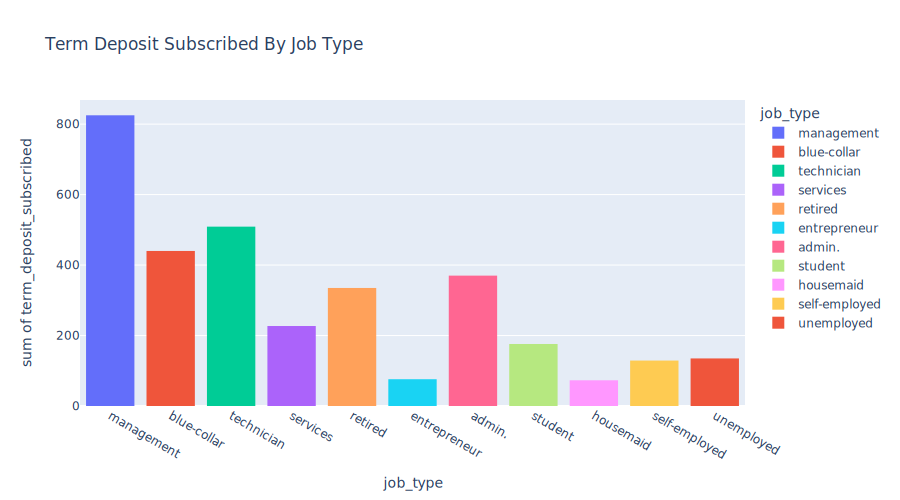

In [67]:
fig=px.histogram(df_train,x='job_type',y='term_deposit_subscribed',color='job_type',title='Term Deposit Subscribed By Job Type')
fig.update_layout(width=900, height=500)
fig.show('svg')

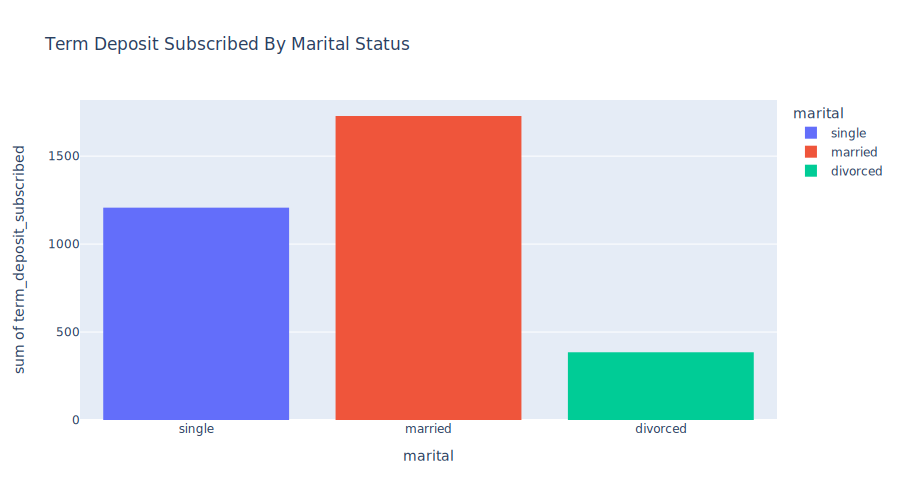

In [68]:
fig=px.histogram(df_train,x='marital',y='term_deposit_subscribed',color='marital',title='Term Deposit Subscribed By Marital Status')
fig.update_layout(width=900, height=500)
fig.show('svg')

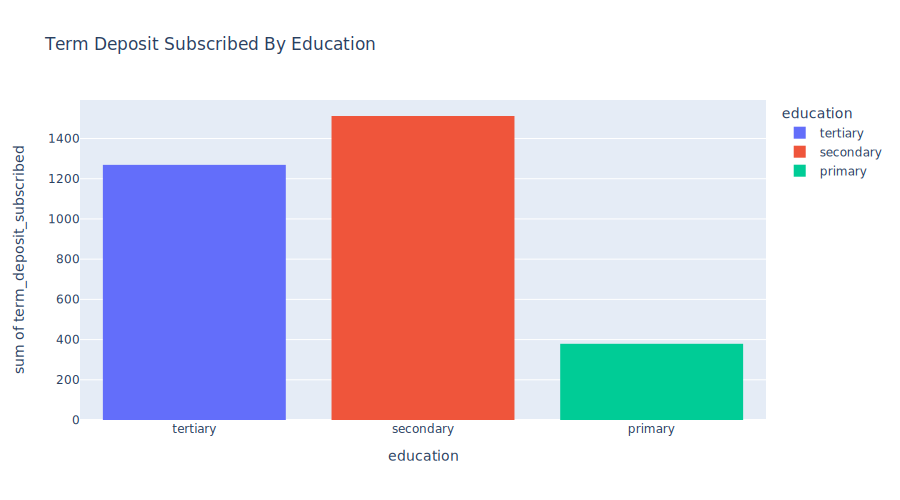

In [69]:
fig=px.histogram(df_train,x='education',y='term_deposit_subscribed',color='education',title='Term Deposit Subscribed By Education')
fig.update_layout(width=900, height=500)
fig.show('svg')

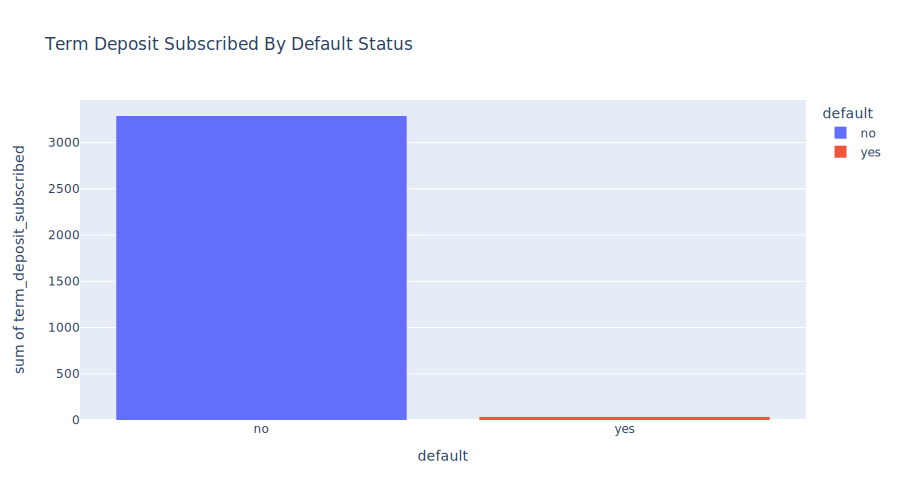

In [70]:
fig=px.histogram(df_train,x='default',y='term_deposit_subscribed',color='default',title='Term Deposit Subscribed By Default Status')
fig.update_layout(width=900, height=500)
fig.show('svg')

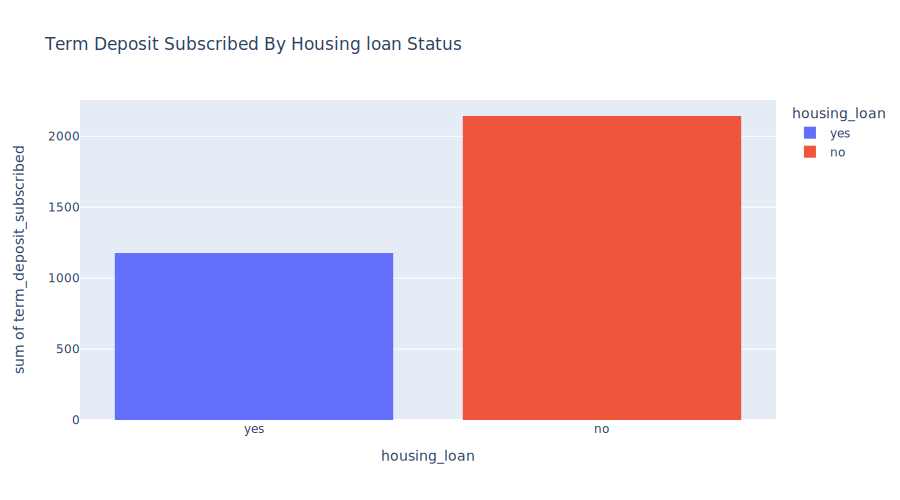

In [71]:
fig=px.histogram(df_train,x='housing_loan',y='term_deposit_subscribed',color='housing_loan',title='Term Deposit Subscribed By Housing loan Status')
fig.update_layout(width=900, height=500)
fig.show('svg')

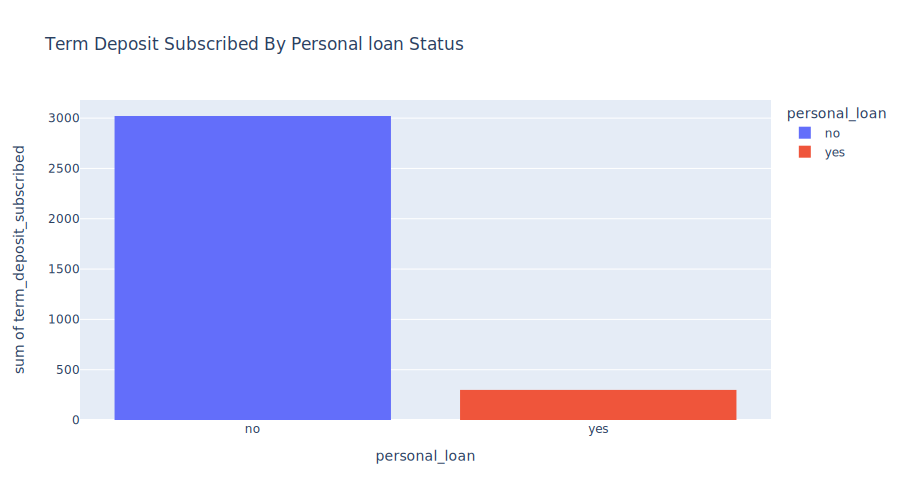

In [72]:
fig=px.histogram(df_train,x='personal_loan',y='term_deposit_subscribed',color='personal_loan',title='Term Deposit Subscribed By Personal loan Status')
fig.update_layout(width=900, height=500)
fig.show('svg')

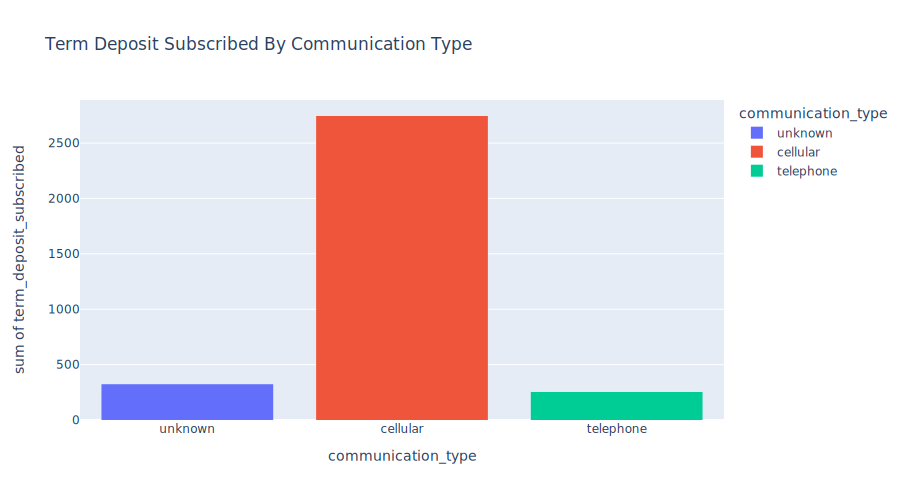

In [73]:
fig=px.histogram(df_train,x='communication_type',y='term_deposit_subscribed',color='communication_type',title='Term Deposit Subscribed By Communication Type')
fig.update_layout(width=900, height=500)
fig.show('svg')

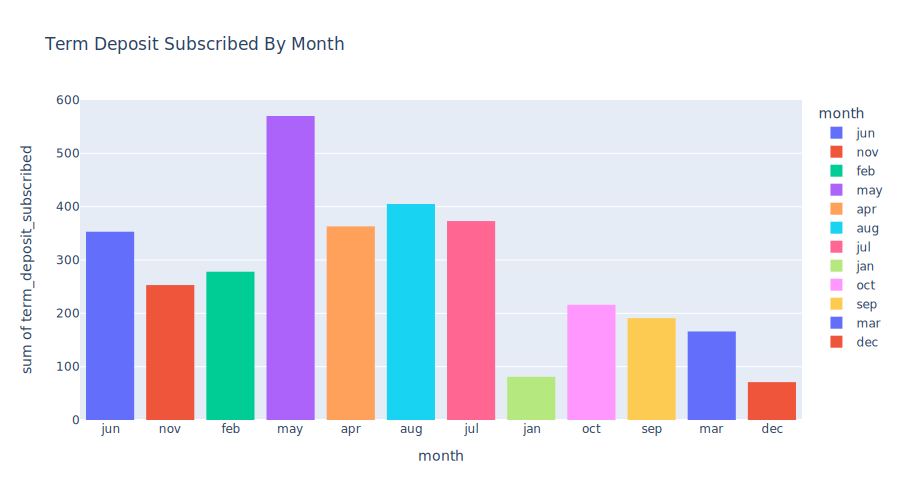

In [74]:
fig=px.histogram(df_train,x='month',y='term_deposit_subscribed',color='month',title='Term Deposit Subscribed By Month')
fig.update_layout(width=900, height=500)
fig.show('svg')

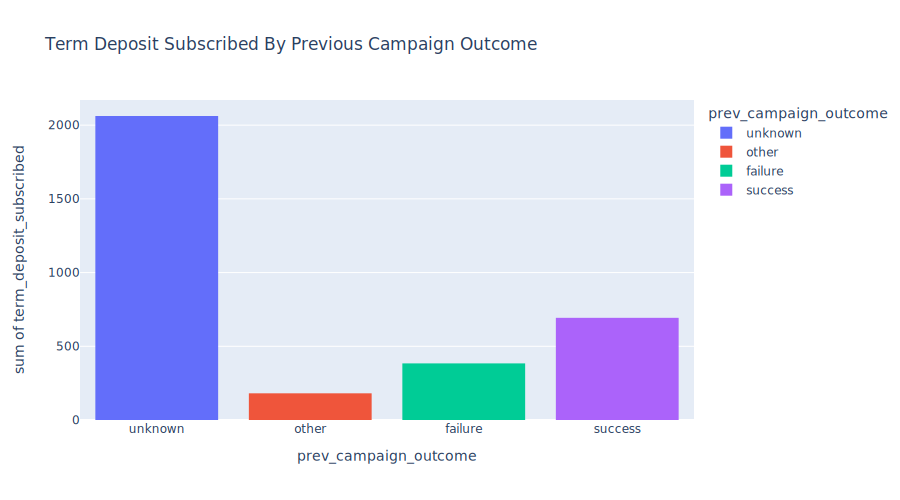

In [75]:
fig=px.histogram(df_train,x='prev_campaign_outcome',y='term_deposit_subscribed',color='prev_campaign_outcome',title='Term Deposit Subscribed By Previous Campaign Outcome')
fig.update_layout(width=900, height=500)
fig.show('svg')

## Feature Engineering

### Checking Multi-collinearity

In [76]:
df_train.corr()

customer_age   balance  day_of_month  \
customer_age                          1.000000  0.103011     -0.013984   
balance                               0.103011  1.000000      0.001128   
day_of_month                         -0.013984  0.001128      1.000000   
last_contact_duration                -0.006352  0.016073     -0.034274   
num_contacts_in_campaign              0.005996 -0.021389      0.166591   
days_since_prev_campaign_contact     -0.001943 -0.035737      0.082444   
num_contacts_prev_campaign           -0.001273  0.011674     -0.049240   
term_deposit_subscribed               0.030414  0.052285     -0.024733   

                                  last_contact_duration  \
customer_age                                  -0.006352   
balance                                        0.016073   
day_of_month                                  -0.034274   
last_contact_duration                          1.000000   
num_contacts_in_campaign                      -0.086489   
days_since_prev_campaign_contact              -0.006920   
num_contacts_prev_campaign                     0.005779   
term_deposit_subscribed                        0.417024   

                                  num_contacts_in_campaign  \
customer_age                                      0.005996   
balance                                          -0.021389   
day_of_month                                      0.166591   
last_contact_duration                            -0.086489   
num_contacts_in_campaign                          1.000000   
days_since_prev_campaign_contact                  0.109548   
num_contacts_prev_campaign                       -0.033481   
term_deposit_subscribed                          -0.071072   

                                  days_since_prev_campaign_contact  \
customer_age                                             -0.001943   
balance                                                  -0.035737   
day_of_month                                              0.082444   
last_contact_duration                                    -0.006920   
num_contacts_in_campaign                                  0.109548   
days_since_prev_campaign_contact                          1.000000   
num_contacts_prev_campaign                               -0.492010   
term_deposit_subscribed                                  -0.188739   

                                  num_contacts_prev_campaign  \
customer_age                                       -0.001273   
balance                                             0.011674   
day_of_month                                       -0.049240   
last_contact_duration                               0.005779   
num_contacts_in_campaign                           -0.033481   
days_since_prev_campaign_contact                   -0.492010   
num_contacts_prev_campaign                          1.000000   
term_deposit_subscribed                             0.089015   

                                  term_deposit_subscribed  
customer_age                                     0.030414  
balance                                          0.052285  
day_of_month                                    -0.024733  
last_contact_duration                            0.417024  
num_contacts_in_campaign                        -0.071072  
days_since_prev_campaign_contact                -0.188739  
num_contacts_prev_campaign                       0.089015  
term_deposit_subscribed                          1.000000

<Axes: >

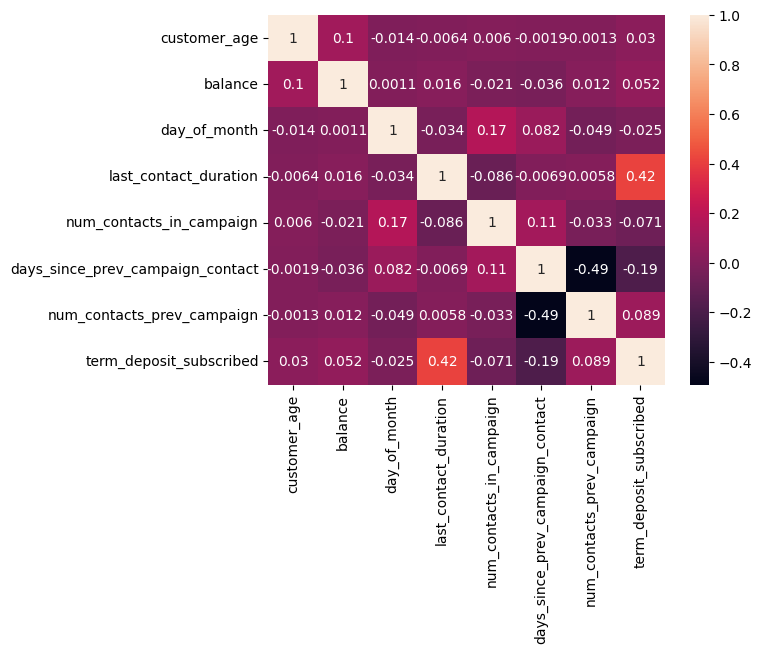

In [77]:
sns.heatmap(df_train.corr(),annot=True)

## Encoding categorical variable 

In [78]:
label_encoder = LabelEncoder()

In [79]:
Ex_train=df_train.copy()
Ex_train.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [80]:
Ex_test=df_test.copy()
Ex_test.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single    unknown      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             999.0                           0   
2                             999.0                           0   
3                             999.0                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [81]:
Ex_test.drop('id',axis=1,inplace=True)

In [82]:
job={'blue-collar':4,
    'management':10,       
    'technician':5,
    'admin.':9,           
    'services':8,         
    'retired':7,          
    'self-employed':6,
    'entrepreneur':11,     
    'unemployed':3,
    'housemaid':2,
    'student':1}

In [83]:
Ex_train['job_type']=Ex_train['job_type'].map(job)

In [84]:
Ex_test['job_type']=Ex_test['job_type'].map(job)

In [85]:
Ex_train['education'] = Ex_train['education'].map({'primary': 1, 'secondary': 2,'tertiary':3})

In [86]:
Ex_test['education'] = Ex_test['education'].map({'primary': 1, 'secondary': 2,'tertiary':3})

In [87]:
Ex_train['month'] = Ex_train['month'].map({'jan': 1, 'feb': 2,'march':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [88]:
Ex_test['month'] = Ex_test['month'].map({'jan': 1, 'feb': 2,'march':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [89]:
le_col=['job_type','education','month','num_contacts_prev_campaign','term_deposit_subscribed','default','housing_loan','personal_loan']

In [90]:
Ex_train['default'] = Ex_train['default'].map({'yes': 1, 'no':0})

In [91]:
Ex_test['default'] = Ex_test['default'].map({'yes': 1, 'no':0})

In [92]:
Ex_train['housing_loan'] = Ex_train['housing_loan'].map({'yes': 1, 'no':0})

In [93]:
Ex_test['housing_loan'] = Ex_test['housing_loan'].map({'yes': 1, 'no':0})

In [94]:
Ex_train['personal_loan'] = Ex_train['personal_loan'].map({'yes': 1, 'no':0})

In [95]:
Ex_test['personal_loan'] = Ex_test['personal_loan'].map({'yes': 1, 'no':0})

In [96]:
Ex_train.communication_type.value_counts()

cellular     20018
unknown       8943
telephone     1969
Name: communication_type, dtype: int64

In [97]:
Ex_train.prev_campaign_outcome.value_counts()

unknown    25266
failure     3389
other       1236
success     1039
Name: prev_campaign_outcome, dtype: int64

In [98]:
Ex_train.marital.value_counts()

married     18587
single       8713
divorced     3630
Name: marital, dtype: int64

In [99]:
Ex_train.default.value_counts()

0    30389
1      541
Name: default, dtype: int64

In [100]:
Ex_test.head()

customer_age  job_type   marital  education  default  balance  \
0          55.0       7.0   married        3.0        0   7136.0   
1          24.0       4.0    single        2.0        0    179.0   
2          46.0       5.0  divorced        2.0        0    143.0   
3          56.0       2.0    single        NaN        0   6023.0   
4          62.0       7.0   married        2.0        0   2913.0   

   housing_loan  personal_loan communication_type  day_of_month  month  \
0             0              0           cellular            13    8.0   
1             1              0           cellular            18    5.0   
2             0              0           cellular             8    7.0   
3             0              0            unknown             6    6.0   
4             0              0           cellular            12    4.0   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             999.0                           0   
2                             999.0                           0   
3                             999.0                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [101]:
Ex_train.head()

customer_age  job_type  marital  education  default  balance  housing_loan  \
0          28.0      10.0   single        3.0        0    285.0             1   
1          34.0       4.0  married        2.0        0    934.0             0   
2          46.0       5.0  married        2.0        0    656.0             0   
3          34.0       8.0   single        2.0        0      2.0             1   
4          41.0       4.0  married        1.0        0   1352.0             1   

   personal_loan communication_type  day_of_month  month  \
0              0            unknown            26    6.0   
1              1           cellular            18   11.0   
2              0           cellular             5    2.0   
3              0            unknown            20    5.0   
4              0           cellular            13    5.0   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             132.0                           1   
2                             999.0                           0   
3                             999.0                           0   
4                             999.0                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [102]:
Ex_train.education.value_counts()

2.0    15889
3.0     9084
1.0     4683
Name: education, dtype: int64

In [103]:
df_train.education.value_counts()

secondary    15889
tertiary      9084
primary       4683
Name: education, dtype: int64

In [104]:
Ex_train.job_type.value_counts()

4.0     6653
10.0    6499
5.0     5123
9.0     3541
8.0     2863
7.0     1547
6.0     1094
11.0    1004
3.0      890
2.0      869
1.0      651
Name: job_type, dtype: int64

In [105]:
df_train.job_type.value_counts()

blue-collar      6653
management       6499
technician       5123
admin.           3541
services         2863
retired          1547
self-employed    1094
entrepreneur     1004
unemployed        890
housemaid         869
student           651
Name: job_type, dtype: int64

In [106]:
Ex_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30930 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      30930 non-null  float64
 1   job_type                          30734 non-null  float64
 2   marital                           30930 non-null  object 
 3   education                         29656 non-null  float64
 4   default                           30930 non-null  int64  
 5   balance                           30930 non-null  float64
 6   housing_loan                      30930 non-null  int64  
 7   personal_loan                     30930 non-null  int64  
 8   communication_type                30930 non-null  object 
 9   day_of_month                      30930 non-null  int64  
 10  month                             30605 non-null  float64
 11  last_contact_duration             30930 non-null  float64
 12  num_

In [107]:
Ex_test.head()

customer_age  job_type   marital  education  default  balance  \
0          55.0       7.0   married        3.0        0   7136.0   
1          24.0       4.0    single        2.0        0    179.0   
2          46.0       5.0  divorced        2.0        0    143.0   
3          56.0       2.0    single        NaN        0   6023.0   
4          62.0       7.0   married        2.0        0   2913.0   

   housing_loan  personal_loan communication_type  day_of_month  month  \
0             0              0           cellular            13    8.0   
1             1              0           cellular            18    5.0   
2             0              0           cellular             8    7.0   
3             0              0            unknown             6    6.0   
4             0              0           cellular            12    4.0   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             999.0                           0   
2                             999.0                           0   
3                             999.0                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [108]:
Ex_test["job_type"] = Ex_test["job_type"].astype("float64")

In [109]:
Ex_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13247 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      13247 non-null  float64
 1   job_type                          13162 non-null  float64
 2   marital                           13247 non-null  object 
 3   education                         12700 non-null  float64
 4   default                           13247 non-null  int64  
 5   balance                           13247 non-null  float64
 6   housing_loan                      13247 non-null  int64  
 7   personal_loan                     13247 non-null  int64  
 8   communication_type                13247 non-null  object 
 9   day_of_month                      13247 non-null  int64  
 10  month                             13110 non-null  float64
 11  last_contact_duration             13247 non-null  float64
 12  num_

In [110]:
dum_col=[]
for col in categorical_train:
    if col not in le_col:
        dum_col.append(col)
dum_col

['marital', 'communication_type', 'prev_campaign_outcome']

In [111]:
df_n=pd.get_dummies(Ex_train,dum_col,drop_first=True)

In [112]:
df_t=pd.get_dummies(Ex_test,dum_col,drop_first=True)

In [113]:
df_n.head(200)

customer_age  job_type  education  default  balance  housing_loan  \
0            28.0      10.0        3.0        0    285.0             1   
1            34.0       4.0        2.0        0    934.0             0   
2            46.0       5.0        2.0        0    656.0             0   
3            34.0       8.0        2.0        0      2.0             1   
4            41.0       4.0        1.0        0   1352.0             1   
5            65.0       7.0        1.0        0   2880.0             0   
6            57.0       4.0        1.0        0    495.0             0   
8            29.0       5.0        2.0        0    265.0             1   
9            50.0       4.0        2.0        0    407.0             1   
10           52.0       4.0        3.0        0   1779.0             0   
11           35.0       5.0        2.0        0   5212.0             1   
12           18.0       4.0        2.0        0    420.0             1   
13           50.0      10.0        2.0        0   4873.0             0   
14           55.0       4.0        1.0        0    762.0             0   
15           42.0      10.0        3.0        0     55.0             1   
16           37.0       4.0        1.0        0      3.0             0   
17           41.0       5.0        2.0        0     -3.0             1   
18           41.0       8.0        2.0        0   -145.0             0   
19           53.0       7.0        2.0        1   -204.0             0   
20           58.0       4.0        2.0        0      1.0             0   
21           70.0       7.0        1.0        0    479.0             0   
22           34.0       4.0        1.0        0      3.0             1   
23           31.0      10.0        3.0        0      3.0             1   
24           41.0      11.0        1.0        0    150.0             0   
25           34.0       8.0        2.0        0   1038.0             0   
27           38.0       5.0        2.0        0    528.0             0   
28           45.0       9.0        2.0        0  10390.0             1   
29           33.0       9.0        2.0        0     54.0             0   
30           25.0       1.0        3.0        0    192.0             0   
31           61.0       9.0        1.0        0    882.0             1   
32           37.0      10.0        2.0        0      0.0             0   
33           31.0       9.0        2.0        0     93.0             1   
34           20.0       2.0        2.0        0    649.0             1   
35           54.0      10.0        3.0        0   1459.0             0   
36           36.0       9.0        2.0        0   -327.0             1   
37           64.0       7.0        1.0        0     50.0             0   
38           30.0       6.0        2.0        0    580.0             1   
39           32.0       6.0        2.0        0     96.0             1   
40           32.0      10.0        3.0        0     85.0             0   
41           34.0       4.0        2.0        0    365.0             1   
42           48.0      11.0        3.0        0    358.0             1   
43           29.0      10.0        3.0        0     50.0             0   
44           45.0       5.0        2.0        0   1672.0             0   
45           29.0       4.0        1.0        0   -334.0             0   
46           42.0       9.0        2.0        0   -495.0             1   
47           32.0      10.0        2.0        0   4136.0             1   
48           49.0       4.0        2.0        0     74.0             1   
49           30.0       9.0        2.0        0    390.0             1   
50           61.0       5.0        2.0        0   2738.0             0   
51           40.0       4.0        1.0        0   3380.0             1   
52           32.0       5.0        2.0        0     -5.0             0   
53           30.0      10.0        3.0        0     39.0             1   
54           27.0      11.0        3.0        0    218.0             1   
55       

In [114]:
df_n.isnull().sum()

customer_age                           0
job_type                             196
education                           1274
default                                0
balance                                0
housing_loan                           0
personal_loan                          0
day_of_month                           0
month                                325
last_contact_duration                  0
num_contacts_in_campaign               0
days_since_prev_campaign_contact       0
num_contacts_prev_campaign             0
term_deposit_subscribed                0
marital_married                        0
marital_single                         0
communication_type_telephone           0
communication_type_unknown             0
prev_campaign_outcome_other            0
prev_campaign_outcome_success          0
prev_campaign_outcome_unknown          0
dtype: int64

In [115]:
Missing2=df_n.columns[df_n.isnull().any()].tolist() 
Missing2

['job_type', 'education', 'month']

In [116]:
df_n.dropna(subset=Missing2,inplace=True)

In [117]:
df_n.isnull().sum()

customer_age                        0
job_type                            0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
term_deposit_subscribed             0
marital_married                     0
marital_single                      0
communication_type_telephone        0
communication_type_unknown          0
prev_campaign_outcome_other         0
prev_campaign_outcome_success       0
prev_campaign_outcome_unknown       0
dtype: int64

In [118]:
df_t.dropna(subset=Missing2,inplace=True)

# Feature Selection

<Axes: >

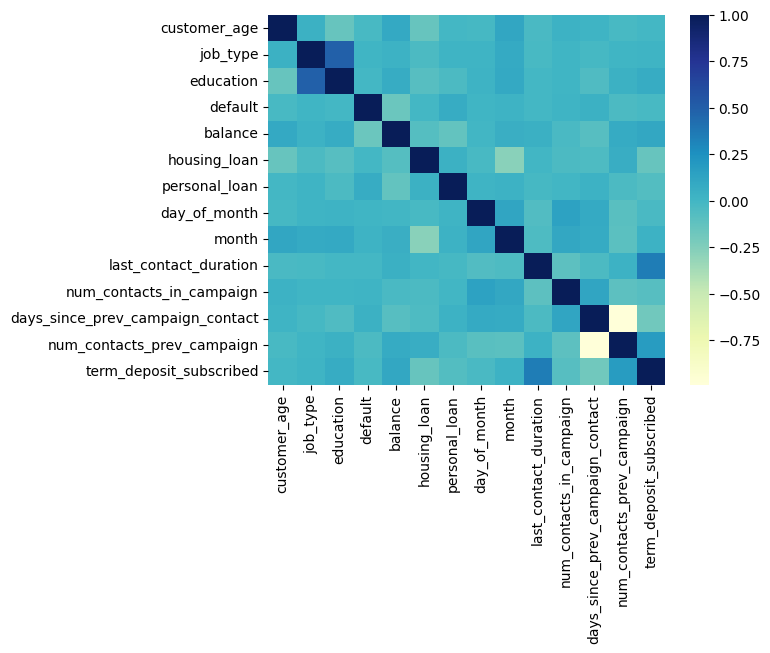

In [139]:
sns.heatmap(Ex_train.corr(method='spearman'), cmap='YlGnBu')

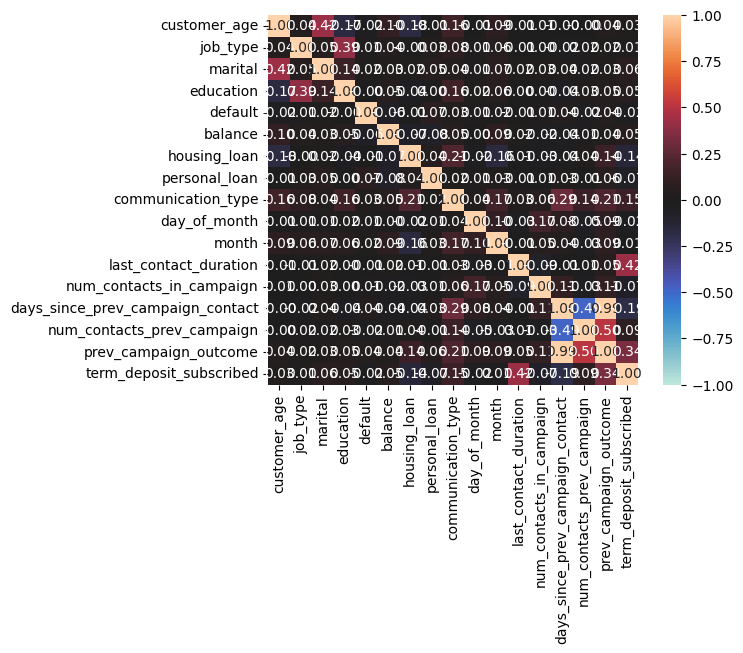

{'corr':                                   customer_age  job_type   marital  education  \
 customer_age                          1.000000  0.042267  0.423260  -0.168012   
 job_type                              0.042267  1.000000  0.047750   0.393737   
 marital                               0.423260  0.047750  1.000000   0.137219   
 education                            -0.168012  0.393737  0.137219   1.000000   
 default                              -0.020750  0.008606  0.017122  -0.003931   
 balance                               0.103011  0.043975  0.026713   0.049297   
 housing_loan                         -0.178249 -0.000452  0.020330  -0.039180   
 personal_loan                        -0.014340  0.028799  0.054612   0.001939   
 communication_type                    0.163683  0.079469  0.041426   0.160842   
 day_of_month                         -0.013984  0.012944  0.011641   0.022680   
 month                                 0.085842  0.055607  0.066410   0.060289   
 last_co

In [140]:
associations(Ex_train)

In [141]:
f=df_n.values

In [142]:
f

array([[28., 10.,  3., ...,  0.,  0.,  1.],
       [34.,  4.,  2., ...,  1.,  0.,  0.],
       [46.,  5.,  2., ...,  0.,  0.,  1.],
       ...,
       [41.,  3.,  1., ...,  0.,  0.,  1.],
       [48.,  8.,  2., ...,  0.,  0.,  1.],
       [38.,  5.,  3., ...,  0.,  0.,  1.]])

In [143]:
vif=[]
for i in range(f.shape[1]):
    vif.append(variance_inflation_factor(f[:,0:],i))

In [144]:
pd.DataFrame({'vif':vif},index=df_n.columns)

vif
customer_age                       14.928853
job_type                            8.954674
education                          13.704689
default                             1.030011
balance                             1.234330
housing_loan                        2.583073
personal_loan                       1.222396
day_of_month                        4.750532
month                               8.032035
last_contact_duration               2.487216
num_contacts_in_campaign            1.895751
days_since_prev_campaign_contact  260.236612
num_contacts_prev_campaign          1.377676
term_deposit_subscribed             1.610967
marital_married                     5.496144
marital_single                      3.236364
communication_type_telephone        1.132961
communication_type_unknown          1.752783
prev_campaign_outcome_other         1.339063
prev_campaign_outcome_success       1.429399
prev_campaign_outcome_unknown     172.910681

In [145]:
mul_co=['customer_age','days_since_prev_campaign_contact','education','days_since_prev_campaign_contact','prev_campaign_outcome_unknown']

In [146]:
df_x=df_n.drop(mul_co,axis=1)

In [147]:
df_x.head()

job_type  default  balance  housing_loan  personal_loan  day_of_month  \
0      10.0        0    285.0             1              0            26   
1       4.0        0    934.0             0              1            18   
2       5.0        0    656.0             0              0             5   
3       8.0        0      2.0             1              0            20   
4       4.0        0   1352.0             1              0            13   

   month  last_contact_duration  num_contacts_in_campaign  \
0    6.0                  303.0                       4.0   
1   11.0                  143.0                       2.0   
2    2.0                  101.0                       4.0   
3    5.0                  127.0                       3.0   
4    5.0                   49.0                       2.0   

   num_contacts_prev_campaign  term_deposit_subscribed  marital_married  \
0                           0                        0                0   
1                           1                        0                1   
2                           0                        0                1   
3                           0                        0                0   
4                           0                        0                1   

   marital_single  communication_type_telephone  communication_type_unknown  \
0               1                             0                           1   
1               0                             0                           0   
2               0                             0                           0   
3               1                             0                           1   
4               0                             0                           0   

   prev_campaign_outcome_other  prev_campaign_outcome_success  
0                            0                              0  
1                            1                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0

In [148]:
f1=df_x.values

In [149]:
f1

array([[1.000e+01, 0.000e+00, 2.850e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 0.000e+00, 9.340e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+00, 0.000e+00, 6.560e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.000e+00, 0.000e+00, 2.420e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+00, 0.000e+00, 2.699e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 0.000e+00, 1.045e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [150]:
vif=[]
for i in range(f1.shape[1]):
    vif.append(variance_inflation_factor(f1[:,0:],i))

In [151]:
pd.DataFrame({'vif':vif},index=df_x.columns)

vif
job_type                       5.697236
default                        1.029140
balance                        1.221007
housing_loan                   2.376272
personal_loan                  1.218992
day_of_month                   4.438911
month                          6.485949
last_contact_duration          2.409929
num_contacts_in_campaign       1.863166
num_contacts_prev_campaign     1.212859
term_deposit_subscribed        1.606992
marital_married                4.624206
marital_single                 2.606595
communication_type_telephone   1.099778
communication_type_unknown     1.542319
prev_campaign_outcome_other    1.159630
prev_campaign_outcome_success  1.230806

In [152]:
df_x.shape

(29239, 17)

## Modelling and Validation

In [153]:
X=df_x.drop(['term_deposit_subscribed'],axis=1).values
Y=df_x['term_deposit_subscribed'].values

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.25,random_state=0)

In [155]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

C:\Users\dutta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [156]:
y_pred = logit.predict(X_test)

In [157]:
f1_score(y_test, y_pred,average='weighted')

0.8874641626600306

In [158]:
cm=confusion_matrix(y_test, y_pred)

In [235]:
print("precision:",precision_score(y_test, y_pred))
print("accuracy:",accuracy_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

precision: 0.6024464831804281
accuracy: 0.9049247606019152
recall: 0.2585301837270341


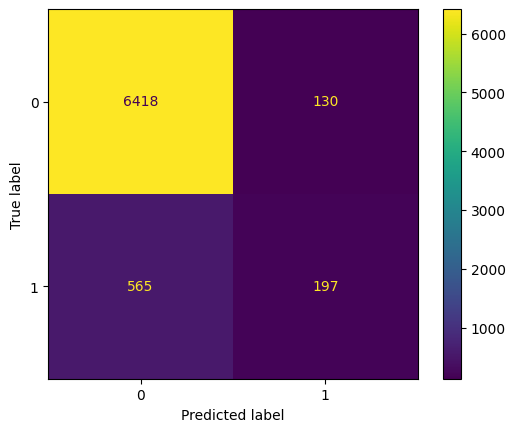

In [159]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### As we can see from the confusion matrix there is a class imbalance in our dataset. We have to fix this issue by oversampling the minority class.

In [160]:
df_train["term_deposit_subscribed"].value_counts()

0    27610
1     3320
Name: term_deposit_subscribed, dtype: int64

In [161]:
oversample = RandomOverSampler(sampling_strategy=0.5)

In [162]:
X_resampled, y_resampled = oversample.fit_resample(X, Y)

In [163]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=0)

In [164]:
logit2 = LogisticRegression()
logit2.fit(X_train2,y_train2)

C:\Users\dutta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [165]:
y_pred2 = logit.predict(X_test2)

In [166]:
f1_score(y_test2, y_pred2,average='weighted')

0.6949851124675077

In [167]:
cm2=confusion_matrix(y_test2, y_pred2)

In [237]:
print("precision:",precision_score(y_test2, y_pred2))
print("accuracy:",accuracy_score(y_test2, y_pred2))
print("recall:",recall_score(y_test2, y_pred2))

precision: 0.8677766895200784
accuracy: 0.7434985778138968
recall: 0.27045177045177043


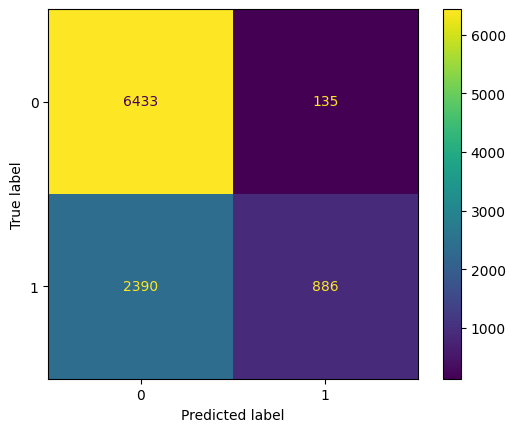

In [168]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

#### So we can See that the performance of our model decreased significantly when we included the correction for class imbalance by oversampling the minor class.

C:\Users\dutta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



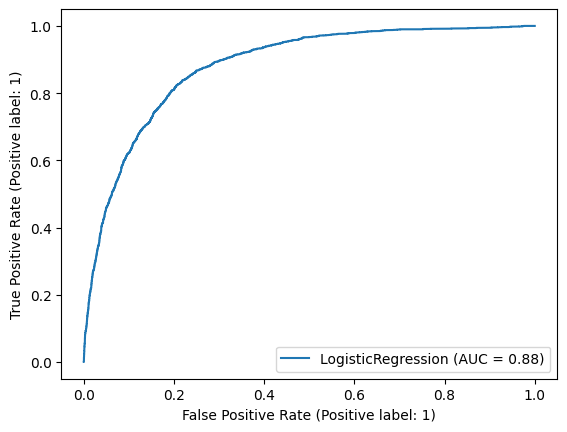

In [169]:
plot_roc_curve(logit, X_test2, y_test2) 

## Ridge Classifier

In [170]:
ridge=RidgeClassifier()

In [171]:
ridge.fit(X_train2,y_train2)

RidgeClassifier()

In [172]:
y_pred3=ridge.predict(X_test2)

In [173]:
f1_score(y_test2, y_pred3,average='weighted')

0.8197771765415357

In [214]:
cm3=confusion_matrix(y_test2, y_pred3)

In [238]:
print("precision:",precision_score(y_test2, y_pred3))
print("accuracy:",accuracy_score(y_test2, y_pred3))
print("recall:",recall_score(y_test2, y_pred3))

precision: 0.8353090601185436
accuracy: 0.8281186509548963
recall: 0.6022588522588522


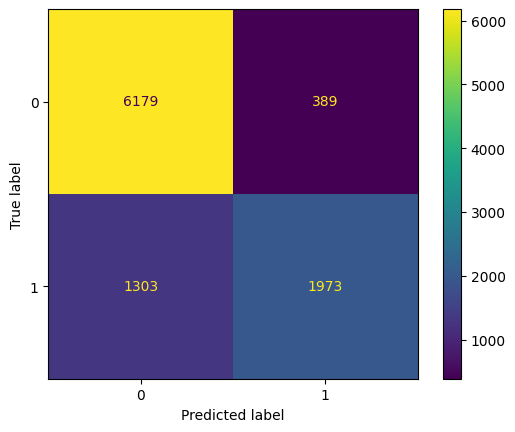

In [215]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()

C:\Users\dutta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



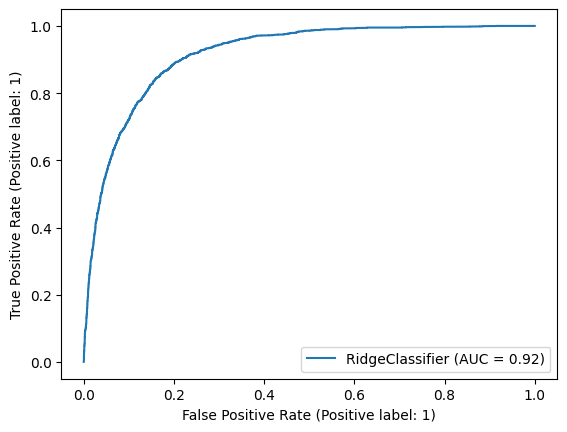

In [176]:
plot_roc_curve(ridge, X_test2, y_test2) 

## Decision Tree Classifier

In [200]:
tree_clf=tree.DecisionTreeClassifier()

In [201]:
tree_clf.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [209]:
y_pred4=tree_clf.predict(X_test2)

In [210]:
f1_score(y_test2, y_pred4,average='weighted')

0.9530612050075356

In [212]:
cm4=confusion_matrix(y_test2, y_pred4)

In [239]:
print("precision:",precision_score(y_test2, y_pred4))
print("accuracy:",accuracy_score(y_test2, y_pred4))
print("recall:",recall_score(y_test2, y_pred4))

precision: 0.883397050791917
accuracy: 0.9524583502641203
recall: 0.9874847374847375


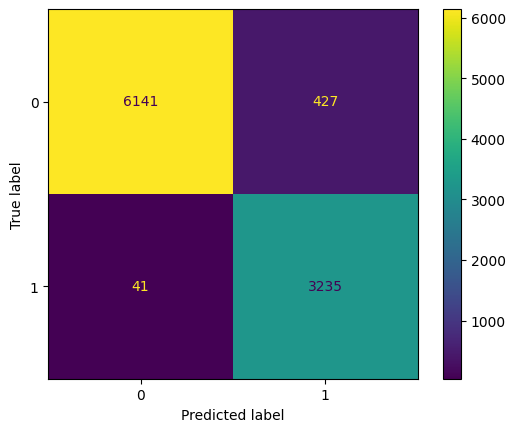

In [213]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()
plt.show()

C:\Users\dutta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



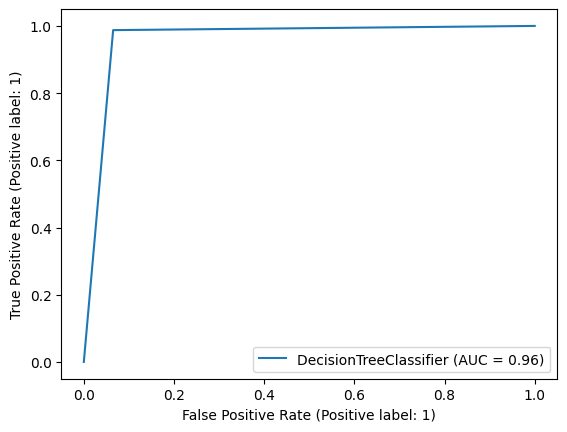

In [216]:
plot_roc_curve(tree_clf, X_test2, y_test2)

## Hyper Parameter Optimization

In [ ]:
#pip install optuna

In [217]:
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators',10,500, step=10)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    clf.fit(X_train2,y_train2)
    y_p=clf.predict(X_test2)
    accuracy=f1_score(y_test2, y_p,average='weighted')
    return accuracy

In [220]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2023-06-20 21:23:19,739] A new study created in memory with name: no-name-39c0173c-39b3-45a1-8389-a6bf9151ba2e
[I 2023-06-20 21:23:22,601] Trial 0 finished with value: 0.9163061001403848 and parameters: {'n_estimators': 140, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9163061001403848.
[I 2023-06-20 21:23:29,500] Trial 1 finished with value: 0.9253328937038651 and parameters: {'n_estimators': 330, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.9253328937038651.
[I 2023-06-20 21:23:32,243] Trial 2 finished with value: 0.9221169508555213 and parameters: {'n_estimators': 130, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.9253328937038651.
[I 2023-06-20 21:23:40,366] Trial 3 finished with value: 0.8905532619202925 and parameters: {'n_estimators': 480, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 1 with value:

[I 2023-06-20 21:27:41,936] Trial 36 finished with value: 0.9478718563597303 and parameters: {'n_estimators': 420, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 16 with value: 0.9533763900373681.
[I 2023-06-20 21:27:49,330] Trial 37 finished with value: 0.9323502797099583 and parameters: {'n_estimators': 340, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 16 with value: 0.9533763900373681.
[I 2023-06-20 21:27:55,740] Trial 38 finished with value: 0.917016763531633 and parameters: {'n_estimators': 310, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 16 with value: 0.9533763900373681.
[I 2023-06-20 21:28:04,551] Trial 39 finished with value: 0.9158336876085026 and parameters: {'n_estimators': 460, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 16 with value: 0.9533763900373681.
[I 2023-06-20 21:28:13,800] Trial 40 finished with value: 0.9507474709337507 and para

[I 2023-06-20 21:30:46,312] Trial 72 finished with value: 0.9552576684180988 and parameters: {'n_estimators': 70, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 44 with value: 0.9559661005308394.
[I 2023-06-20 21:30:47,498] Trial 73 finished with value: 0.956037718861961 and parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 73 with value: 0.956037718861961.
[I 2023-06-20 21:30:48,892] Trial 74 finished with value: 0.9500382520050485 and parameters: {'n_estimators': 60, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 73 with value: 0.956037718861961.
[I 2023-06-20 21:30:49,836] Trial 75 finished with value: 0.9556387787089438 and parameters: {'n_estimators': 40, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 73 with value: 0.956037718861961.
[I 2023-06-20 21:30:50,696] Trial 76 finished with value: 0.9171294239813892 and parameters:

[I 2023-06-20 21:32:00,474] Trial 109 finished with value: 0.9515553989350466 and parameters: {'n_estimators': 30, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:32:00,746] Trial 110 finished with value: 0.9549734386118834 and parameters: {'n_estimators': 10, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:32:01,941] Trial 111 finished with value: 0.9548690692482715 and parameters: {'n_estimators': 50, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:32:09,184] Trial 112 finished with value: 0.9582434732057652 and parameters: {'n_estimators': 310, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:32:16,778] Trial 113 finished with value: 0.957747647417444 and parameters

[I 2023-06-20 21:36:23,003] Trial 145 finished with value: 0.9554532705166245 and parameters: {'n_estimators': 300, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:36:32,140] Trial 146 finished with value: 0.9579435519872022 and parameters: {'n_estimators': 390, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:36:41,686] Trial 147 finished with value: 0.9558495829917744 and parameters: {'n_estimators': 410, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:36:51,868] Trial 148 finished with value: 0.9579435519872022 and parameters: {'n_estimators': 390, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:37:00,373] Trial 149 finished with value: 0.9511596687370091 and parame

[I 2023-06-20 21:41:14,244] Trial 181 finished with value: 0.9582482623143 and parameters: {'n_estimators': 350, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:41:22,494] Trial 182 finished with value: 0.9582482623143 and parameters: {'n_estimators': 350, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:41:30,247] Trial 183 finished with value: 0.9582482623143 and parameters: {'n_estimators': 330, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:41:38,029] Trial 184 finished with value: 0.9582482623143 and parameters: {'n_estimators': 330, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 96 with value: 0.95835219869976.
[I 2023-06-20 21:41:46,044] Trial 185 finished with value: 0.9579483711826821 and parameters: {'n_es

In [221]:
best_params = study.best_params
best_value = study.best_value
print(best_params, best_value )

{'n_estimators': 80, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1} 0.95835219869976


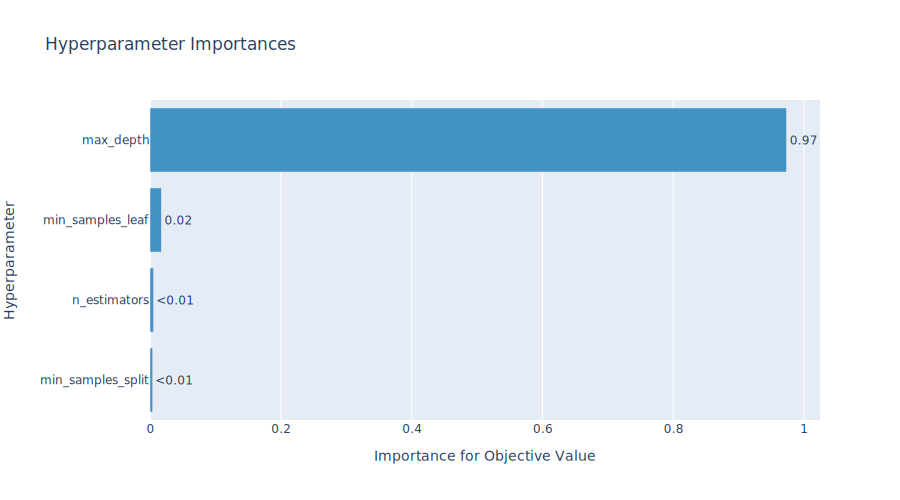

In [248]:
fig=plot_param_importances(study)
fig.update_layout(width=900, height=500)
fig.show('svg')

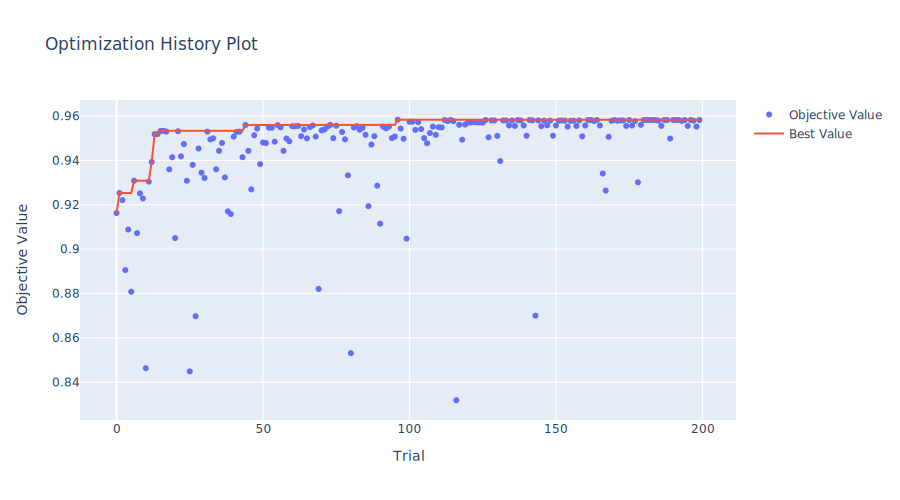

In [249]:
fig=plot_optimization_history(study)
fig.update_layout(width=900, height=500)
fig.show('svg')

## Random Forest Classifier

In [222]:
clf_forest=RandomForestClassifier(
        n_estimators=80,
        max_depth=20,
        min_samples_split=3,
        min_samples_leaf=1,
        random_state=42)

In [223]:
clf_forest.fit(X_train2,y_train2)

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=80,
                       random_state=42)

In [224]:
y_pred5=clf_forest.predict(X_test2)

In [225]:
f1_score(y_test2, y_pred5,average='weighted')

0.95835219869976

In [240]:
print("precision:",precision_score(y_test2, y_pred5))
print("accuracy:",accuracy_score(y_test2, y_pred5))  
print("recall:",recall_score(y_test2, y_pred5))   

precision: 0.8928865696237297
accuracy: 0.957842340511987
recall: 0.9923687423687424


In [226]:
cm4=confusion_matrix(y_test2, y_pred5)

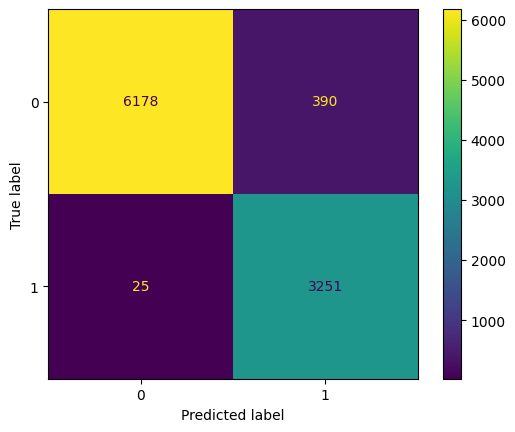

In [227]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()
plt.show()

C:\Users\dutta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



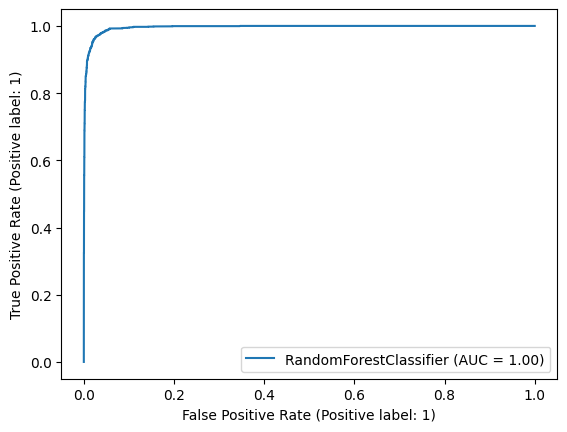

In [228]:
plot_roc_curve(clf_forest, X_test2, y_test2)

## Test Data Cleaning 

In [184]:
df_test.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single    unknown      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                             999.0                           0   
1                             999.0                           0   
2                             999.0                           0   
3                             999.0                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [185]:
df_t.head()

customer_age  job_type  education  default  balance  housing_loan  \
0          55.0       7.0        3.0        0   7136.0             0   
1          24.0       4.0        2.0        0    179.0             1   
2          46.0       5.0        2.0        0    143.0             0   
4          62.0       7.0        2.0        0   2913.0             0   
5          35.0       6.0        3.0        0    355.0             0   

   personal_loan  day_of_month  month  last_contact_duration  \
0              0            13    8.0                   90.0   
1              0            18    5.0                   63.0   
2              0             8    7.0                  208.0   
4              0            12    4.0                  127.0   
5              0            12    8.0                  599.0   

   num_contacts_in_campaign  days_since_prev_campaign_contact  \
0                       2.0                             999.0   
1                       2.0                             999.0   
2                       1.0                             999.0   
4                       1.0                             188.0   
5                       1.0                             999.0   

   num_contacts_prev_campaign  marital_married  marital_single  \
0                           0                1               0   
1                           0                0               1   
2                           0                0               0   
4                           1                1               0   
5                           0                0               1   

   communication_type_telephone  communication_type_unknown  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
4                             0                           0   
5                             0                           0   

   prev_campaign_outcome_other  prev_campaign_outcome_success  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
4                            0                              1   
5                            0                              0   

   prev_campaign_outcome_unknown  
0                              1  
1                              1  
2                              1  
4                              0  
5                              1

In [186]:
df_x.head()

job_type  default  balance  housing_loan  personal_loan  day_of_month  \
0      10.0        0    285.0             1              0            26   
1       4.0        0    934.0             0              1            18   
2       5.0        0    656.0             0              0             5   
3       8.0        0      2.0             1              0            20   
4       4.0        0   1352.0             1              0            13   

   month  last_contact_duration  num_contacts_in_campaign  \
0    6.0                  303.0                       4.0   
1   11.0                  143.0                       2.0   
2    2.0                  101.0                       4.0   
3    5.0                  127.0                       3.0   
4    5.0                   49.0                       2.0   

   num_contacts_prev_campaign  term_deposit_subscribed  marital_married  \
0                           0                        0                0   
1                           1                        0                1   
2                           0                        0                1   
3                           0                        0                0   
4                           0                        0                1   

   marital_single  communication_type_telephone  communication_type_unknown  \
0               1                             0                           1   
1               0                             0                           0   
2               0                             0                           0   
3               1                             0                           1   
4               0                             0                           0   

   prev_campaign_outcome_other  prev_campaign_outcome_success  
0                            0                              0  
1                            1                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0

In [187]:
df_t.isnull().sum()

customer_age                        0
job_type                            0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
marital_married                     0
marital_single                      0
communication_type_telephone        0
communication_type_unknown          0
prev_campaign_outcome_other         0
prev_campaign_outcome_success       0
prev_campaign_outcome_unknown       0
dtype: int64

In [188]:
testdf=df_x.drop(['term_deposit_subscribed'],axis=1)

In [189]:
df_t=df_t[testdf.columns]

In [190]:
df_x.head()

job_type  default  balance  housing_loan  personal_loan  day_of_month  \
0      10.0        0    285.0             1              0            26   
1       4.0        0    934.0             0              1            18   
2       5.0        0    656.0             0              0             5   
3       8.0        0      2.0             1              0            20   
4       4.0        0   1352.0             1              0            13   

   month  last_contact_duration  num_contacts_in_campaign  \
0    6.0                  303.0                       4.0   
1   11.0                  143.0                       2.0   
2    2.0                  101.0                       4.0   
3    5.0                  127.0                       3.0   
4    5.0                   49.0                       2.0   

   num_contacts_prev_campaign  term_deposit_subscribed  marital_married  \
0                           0                        0                0   
1                           1                        0                1   
2                           0                        0                1   
3                           0                        0                0   
4                           0                        0                1   

   marital_single  communication_type_telephone  communication_type_unknown  \
0               1                             0                           1   
1               0                             0                           0   
2               0                             0                           0   
3               1                             0                           1   
4               0                             0                           0   

   prev_campaign_outcome_other  prev_campaign_outcome_success  
0                            0                              0  
1                            1                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0

In [191]:
f2=df_t.values
f2

array([[7.000e+00, 0.000e+00, 7.136e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 0.000e+00, 1.790e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 0.000e+00, 1.430e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [4.000e+00, 0.000e+00, 6.040e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 0.000e+00, 2.370e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [9.000e+00, 0.000e+00, 2.410e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [241]:
predictions = clf_forest.predict(f2)

In [242]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [243]:
df_pred=pd.DataFrame(predictions,columns=['Term_Deposit_subscribed'])

In [244]:
df_final=pd.concat([df_test,df_pred],axis=1)

In [245]:
df_final.head(50)

id  customer_age       job_type   marital  education default  \
0   id_17231          55.0        retired   married   tertiary      no   
1   id_34508          24.0    blue-collar    single  secondary      no   
2   id_44504          46.0     technician  divorced  secondary      no   
3     id_174          56.0      housemaid    single    unknown      no   
4    id_2115          62.0        retired   married  secondary      no   
5   id_20153          35.0  self-employed    single   tertiary      no   
6   id_20552          27.0      housemaid    single  secondary      no   
7   id_26080          29.0     management    single   tertiary      no   
8   id_45165          50.0      housemaid   married  secondary      no   
9   id_28373          37.0     management    single   tertiary      no   
10  id_30676          52.0         admin.   married  secondary      no   
11  id_17527          51.0     technician   married  secondary      no   
12  id_31272          30.0     management    single   tertiary      no   
13  id_33164          32.0     technician    single  secondary      no   
14  id_39428          54.0      housemaid   married    primary      no   
15  id_33984          39.0     technician    single   tertiary      no   
16  id_28375          33.0     management    single   tertiary      no   
17  id_40781          33.0     management   married   tertiary      no   
20  id_20393          37.0         admin.   married  secondary      no   
21  id_19080          50.0      housemaid   married    primary      no   
22  id_24906          46.0    blue-collar   married  secondary      no   
23  id_29490          71.0        retired   married   tertiary      no   
25   id_9935          27.0     unemployed   married  secondary      no   
26  id_22074          33.0    blue-collar   married  secondary      no   
27  id_29079          55.0     management  divorced   tertiary      no   
28  id_44857          54.0     management   married    unknown      no   
29   id_8954          79.0        retired   married    primary      no   
30  id_22336          31.0    blue-collar   married  secondary      no   
31  id_43099          37.0        retired   married    primary      no   
33  id_42085          53.0    blue-collar   married  secondary      no   
34  id_38987          39.0     technician   married  secondary      no   
35  id_38527          22.0     management    single  secondary      no   
36  id_28334          66.0        retired   married   tertiary      no   
37  id_39797          49.0         admin.   married  secondary      no   
38  id_20965          29.0         admin.  divorced  secondary      no   
39   id_1411          46.0     management   married   tertiary      no   
40  id_17575          35.0    blue-collar   married    primary      no   
41  id_39429          38.0     management   married   tertiary      no   
42  id_25694          40.0         admin.   married  secondary      no   
43  id_23924          34.0    blue-collar   married  secondary      no   
44   id_4383          51.0     technician   married  secondary     yes   
45  id_15060          35.0    blue-collar   married  secondary      no   
46  id_13009          57.0   entrepreneur  divorced  secondary     yes   
47  id_12884          58.0        retired   married    primary      no   
48  id_10903          27.0         admin.  divorced  secondary      no   
49  id_15789          37.0     technician    single  secondary      no   
50  id_43487          32.0         admin.   married   tertiary      no   
51   id_1585          40.0     management   married   tertiary      no   
52  id_25017          32.0    blue-collar    single  secondary      no   
53  id_26988          41.0       services   married  secondary      no   

    balance housing_loan personal_loan communication_type  day_of_month month  \
0    7136.0           no            no           cellular          13.0   aug   
1     179.0          yes            no           cellular          18.0  